In [21]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno   # Instalado
from scipy.stats import shapiro, kstest, skew, kurtosis
import numpy as np
from scipy.stats import spearmanr #pip install statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce  #  pip install category_encoders
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline  # Para incluir balanceo

from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
























In [4]:
# Carga de Dataset

file_path = "dataset_timeseries_realista_con_target.csv"
df = pd.read_csv(file_path)

In [5]:
# 1.1 Exploraci√≥n Inicial Completa


# 2. Informaci√≥n b√°sica
print("üìå Informaci√≥n b√°sica del dataset")
print("Shape (filas, columnas):", df.shape)
print("\nTipos de datos por columna:")
print(df.dtypes)
print("\nUso de memoria:")
print(df.memory_usage(deep=True))

# 3. Primeras y √∫ltimas observaciones
print("\nüîπ Primeras filas del dataset:")
print(df.head())

print("\nüîπ √öltimas filas del dataset:")
print(df.tail())

# 4. Resumen estad√≠stico completo
print("\nüìä Resumen estad√≠stico de variables num√©ricas:")
print(df.describe().T)

print("\nüìä Resumen estad√≠stico de variables categ√≥ricas:")
print(df.describe(include=['object', 'category']).T)

# 5. Identificaci√≥n de variables categ√≥ricas y num√©ricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nüîé Variables num√©ricas:")
print(num_cols)

print("\nüîé Variables categ√≥ricas:")
print(cat_cols)

üìå Informaci√≥n b√°sica del dataset
Shape (filas, columnas): (300000, 13)

Tipos de datos por columna:
patient_id               int64
visit                    int64
age                    float64
gender                  object
smoking_history         object
diabetes                 int64
hypertension             int64
blood_glucose_level      int64
HbA1c_level            float64
systolic_bp              int64
diastolic_bp             int64
bmi                    float64
target                   int64
dtype: object

Uso de memoria:
Index                       128
patient_id              2400000
visit                   2400000
age                     2400000
gender                 18651366
smoking_history        19002702
diabetes                2400000
hypertension            2400000
blood_glucose_level     2400000
HbA1c_level             2400000
systolic_bp             2400000
diastolic_bp            2400000
bmi                     2400000
target                  2400000
dtype: int64


üìå Porcentaje de valores faltantes por variable:
Series([], dtype: float64)

üìä Visualizaci√≥n de patrones de valores faltantes:


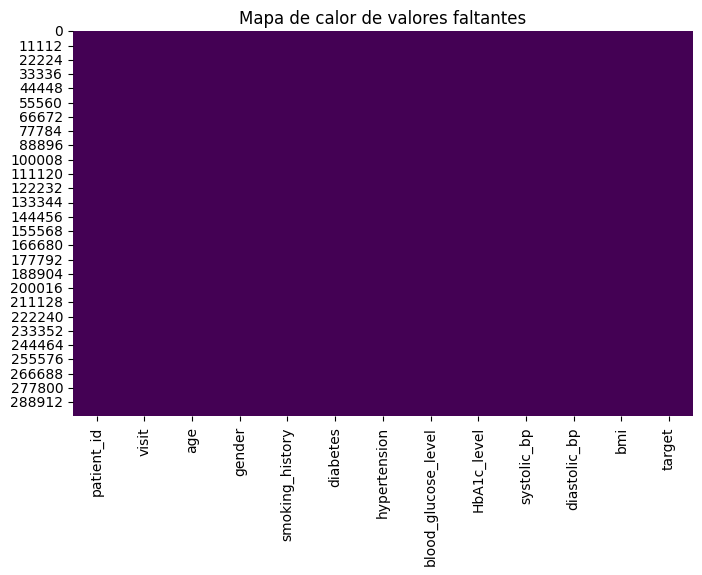

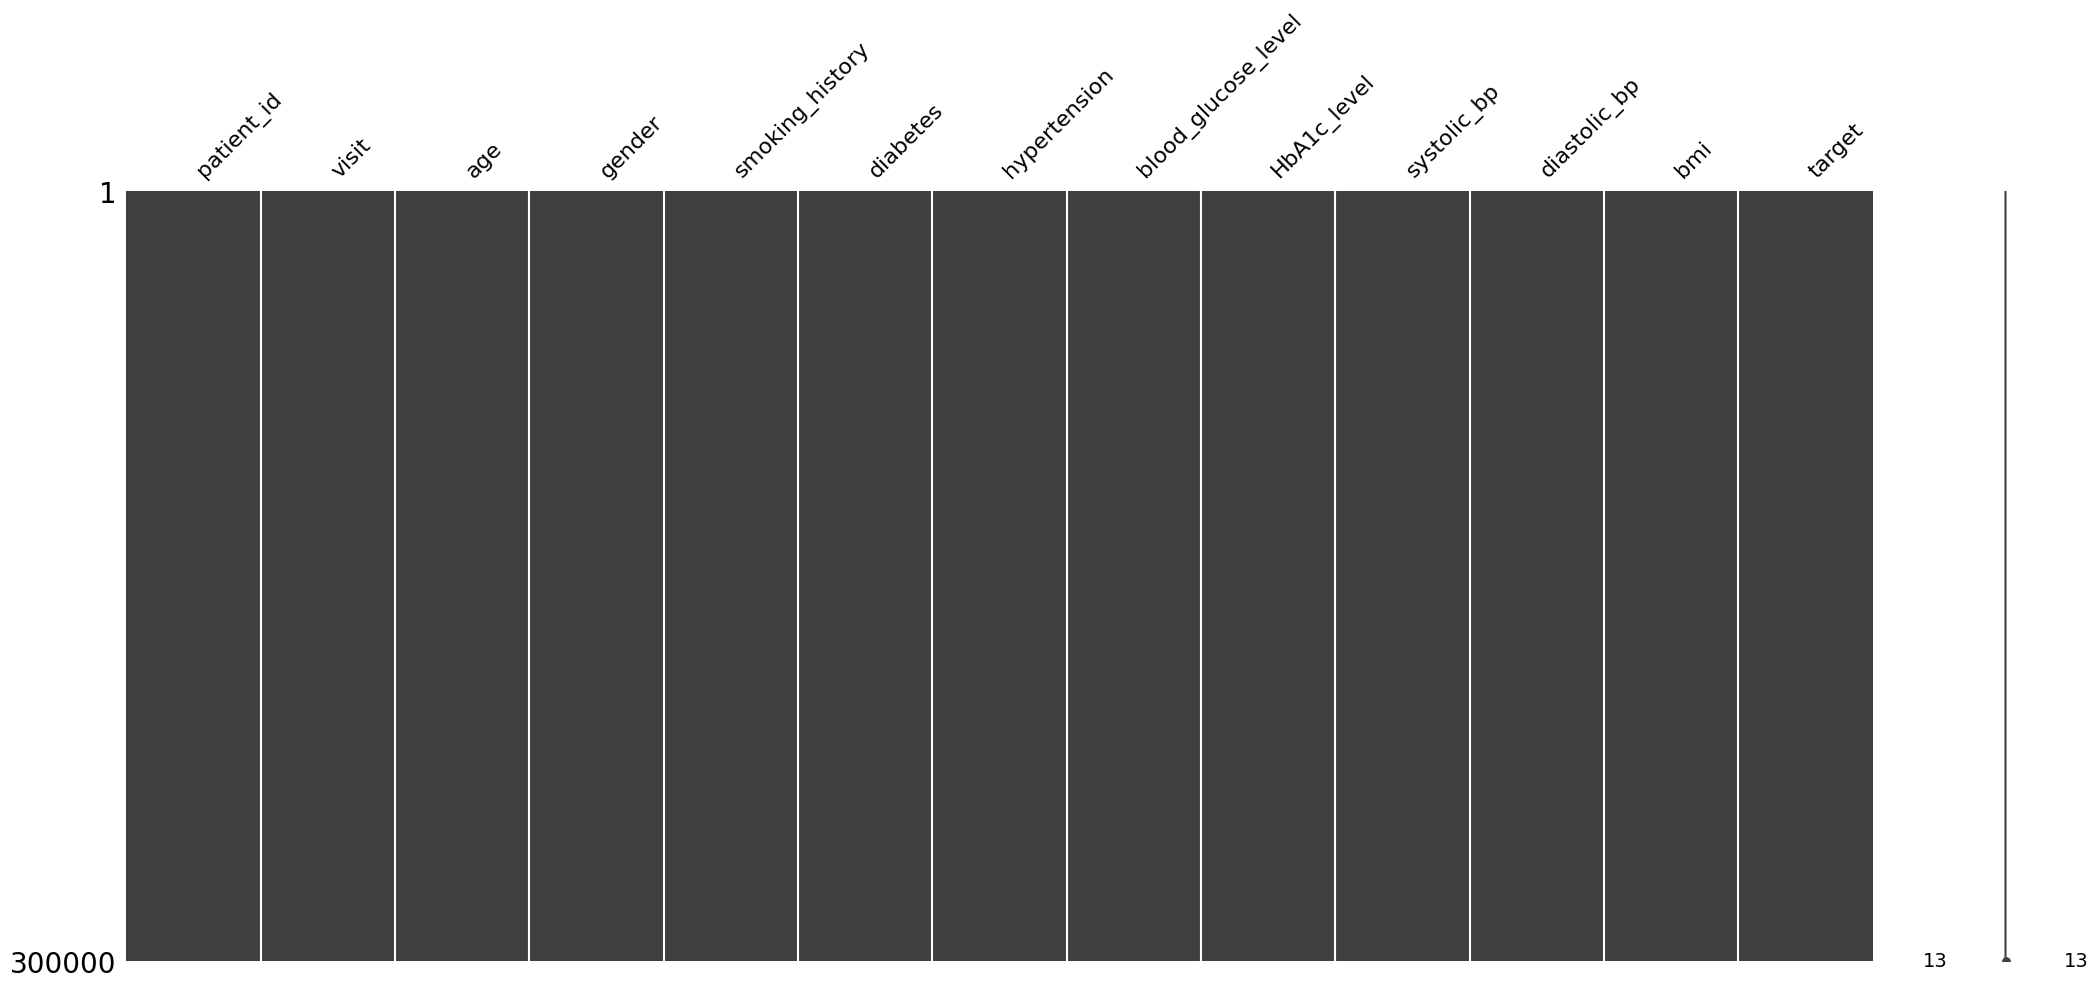

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


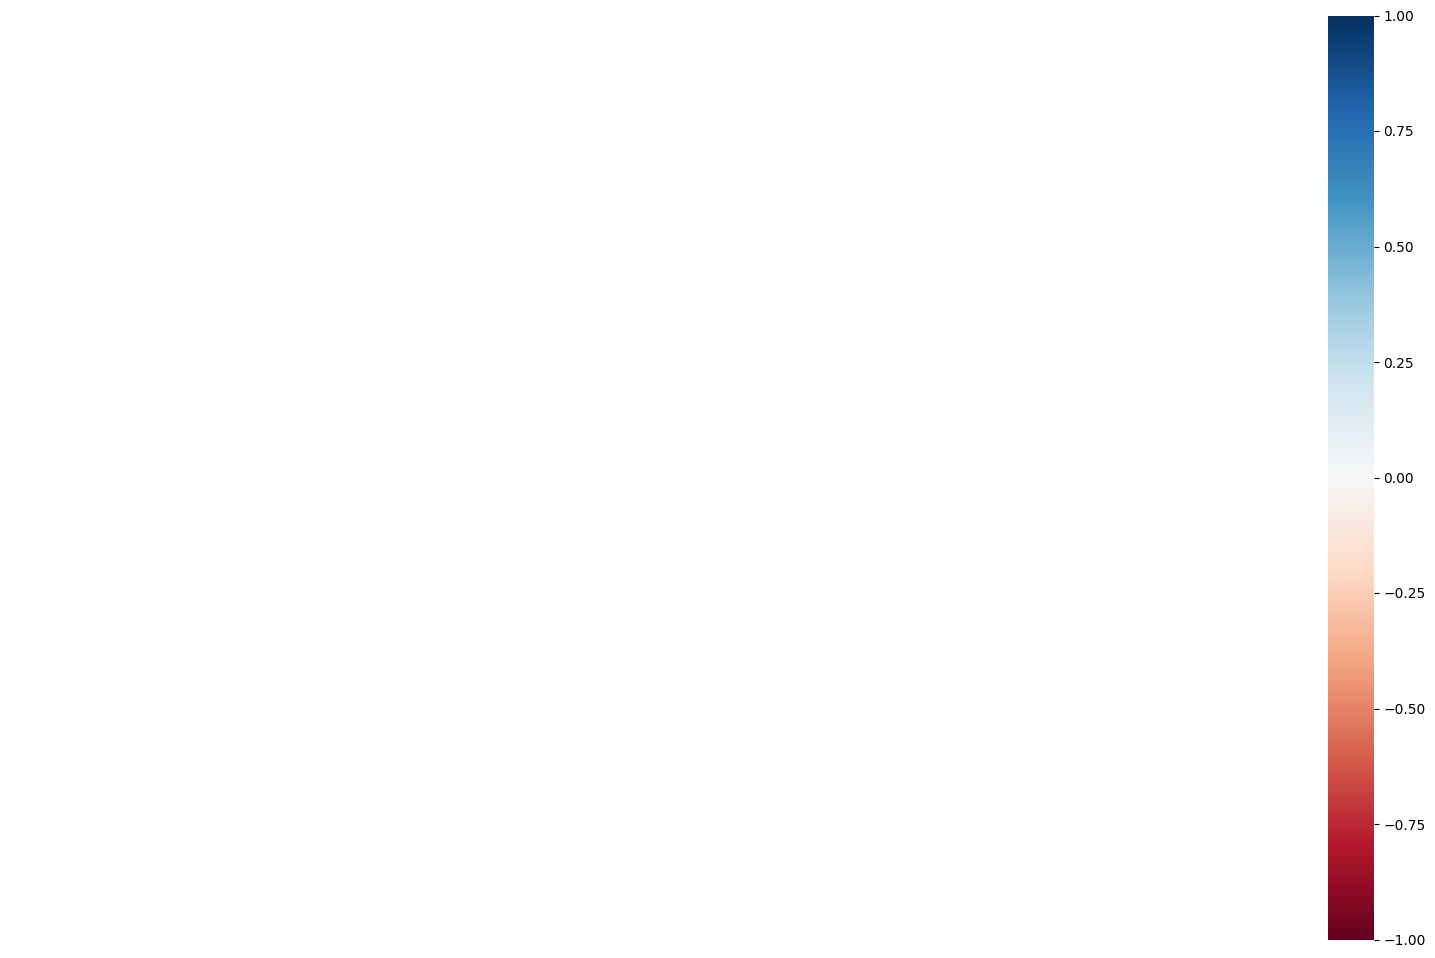


üîé An√°lisis de patrones de valores faltantes:
- MCAR (Completamente al azar): si los faltantes se distribuyen sin patr√≥n aparente.
- MAR (Al azar condicional): si los faltantes dependen de otras variables observadas.
- MNAR (No al azar): si los faltantes dependen de la propia variable.

üí° Estrategias de imputaci√≥n sugeridas:
- Num√©ricas: media, mediana, interpolaci√≥n temporal o KNN imputer.
- Categ√≥ricas: moda o imputaci√≥n por categor√≠a m√°s frecuente.
- Series de tiempo: forward fill (ffill), backward fill (bfill) o interpolaci√≥n lineal.

üìå Registros duplicados exactos: 0
üìå Registros duplicados parciales (por paciente y visita): 0

üí° Estrategias para tratar duplicados:
- Eliminar duplicados exactos.
- En near-duplicates: conservar el registro m√°s reciente o hacer promedio de mediciones.
- Documentar la regla aplicada para consistencia del modelo.


In [6]:
#1.2 An√°lisis de Calidad de Datos#

# ============================
# 1.2 Detecci√≥n y an√°lisis de valores faltantes y duplicados
# ============================


# ============================
# DETECCI√ìN DE VALORES FALTANTES
# ============================

print("üìå Porcentaje de valores faltantes por variable:")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Visualizaci√≥n de missing patterns
print("\nüìä Visualizaci√≥n de patrones de valores faltantes:")
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

# ============================
# AN√ÅLISIS DE PATRONES
# ============================
print("\nüîé An√°lisis de patrones de valores faltantes:")
print("- MCAR (Completamente al azar): si los faltantes se distribuyen sin patr√≥n aparente.")
print("- MAR (Al azar condicional): si los faltantes dependen de otras variables observadas.")
print("- MNAR (No al azar): si los faltantes dependen de la propia variable.")

# ============================
# ESTRATEGIAS DE IMPUTACI√ìN
# ============================
print("\nüí° Estrategias de imputaci√≥n sugeridas:")
print("- Num√©ricas: media, mediana, interpolaci√≥n temporal o KNN imputer.")
print("- Categ√≥ricas: moda o imputaci√≥n por categor√≠a m√°s frecuente.")
print("- Series de tiempo: forward fill (ffill), backward fill (bfill) o interpolaci√≥n lineal.")

# ============================
# DETECCI√ìN DE DUPLICADOS
# ============================

# Duplicados exactos
exact_duplicates = df.duplicated().sum()
print(f"\nüìå Registros duplicados exactos: {exact_duplicates}")

# Near-duplicates: duplicados en variables clave (ejemplo: id paciente y visita)
if "patient_id" in df.columns and "visit" in df.columns:
    near_duplicates = df.duplicated(subset=["patient_id", "visit"]).sum()
    print(f"üìå Registros duplicados parciales (por paciente y visita): {near_duplicates}")
else:
    print("‚ö†Ô∏è No se detectaron columnas clave (patient_id, visit) para near-duplicates.")

# ============================
# ESTRATEGIAS DE RESOLUCI√ìN
# ============================
print("\nüí° Estrategias para tratar duplicados:")
print("- Eliminar duplicados exactos.")
print("- En near-duplicates: conservar el registro m√°s reciente o hacer promedio de mediciones.")
print("- Documentar la regla aplicada para consistencia del modelo.")


===== üìä An√°lisis de Variables Num√©ricas =====


üîπ Variable: patient_id
   Media = 49999.50, Mediana = 49999.50, Moda = 0.00
   Desviaci√≥n est√°ndar = 28867.56, IQR = 49999.50, CV = 0.58
   Asimetr√≠a = 0.00, Curtosis = -1.20
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


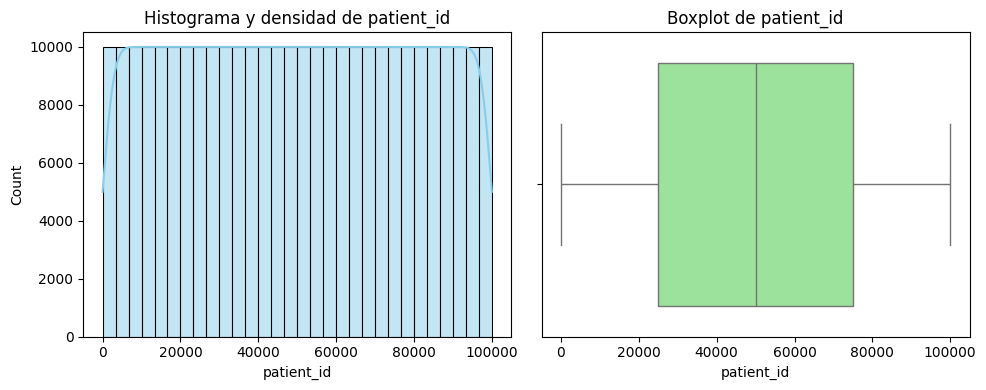


üîπ Variable: visit
   Media = 2.00, Mediana = 2.00, Moda = 1.00
   Desviaci√≥n est√°ndar = 0.82, IQR = 2.00, CV = 0.41
   Asimetr√≠a = 0.00, Curtosis = -1.50
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


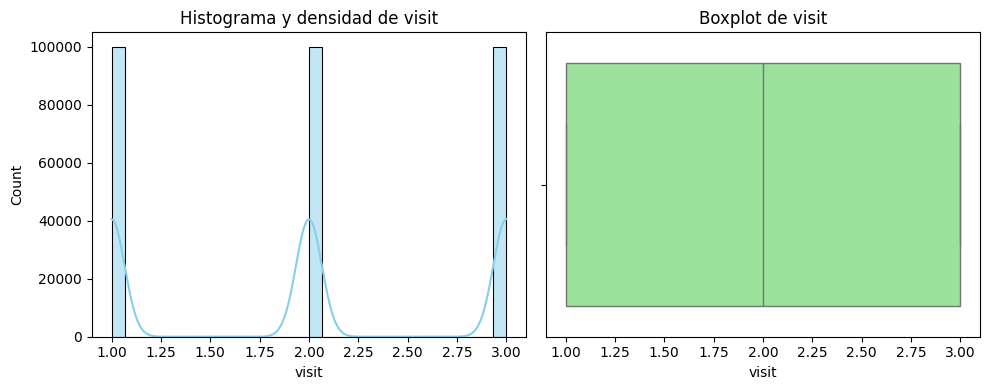


üîπ Variable: age
   Media = 41.89, Mediana = 43.00, Moda = 80.00
   Desviaci√≥n est√°ndar = 22.52, IQR = 36.00, CV = 0.54
   Asimetr√≠a = -0.05, Curtosis = -1.00
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


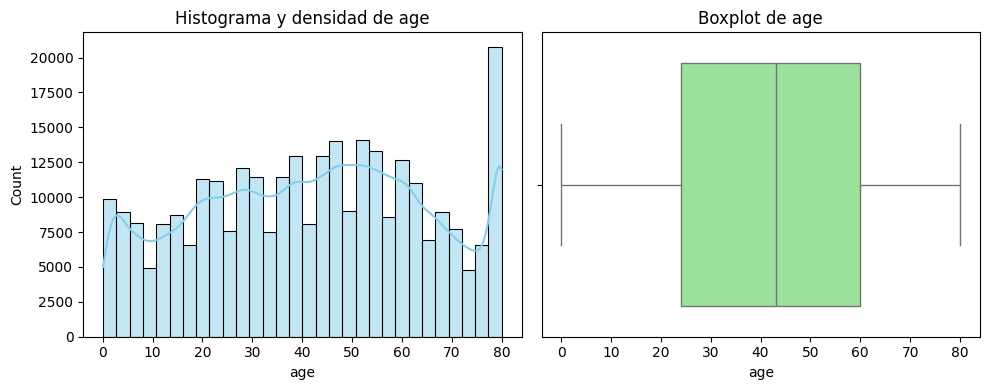


üîπ Variable: diabetes
   Media = 0.09, Mediana = 0.00, Moda = 0.00
   Desviaci√≥n est√°ndar = 0.28, IQR = 0.00, CV = 3.28
   Asimetr√≠a = 2.98, Curtosis = 6.86
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


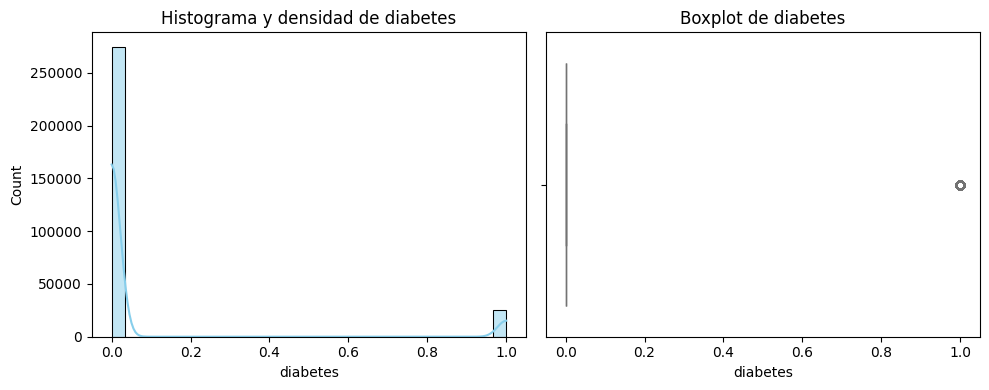


üîπ Variable: hypertension
   Media = 0.07, Mediana = 0.00, Moda = 0.00
   Desviaci√≥n est√°ndar = 0.26, IQR = 0.00, CV = 3.52
   Asimetr√≠a = 3.23, Curtosis = 8.44
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


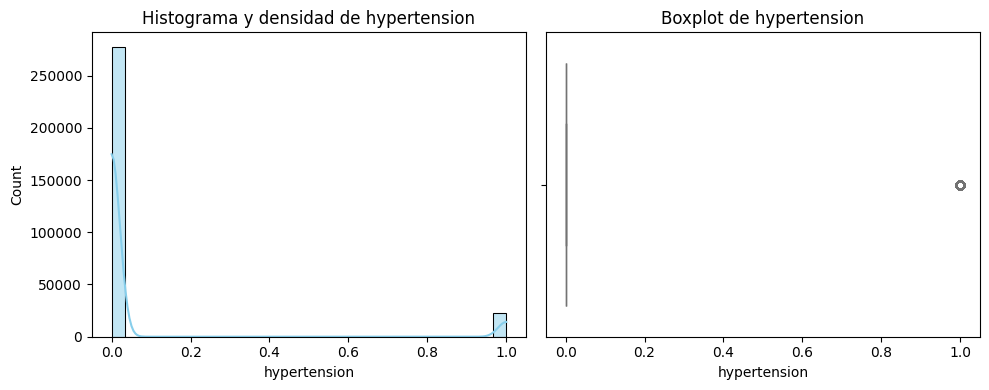


üîπ Variable: blood_glucose_level
   Media = 140.47, Mediana = 142.00, Moda = 158.00
   Desviaci√≥n est√°ndar = 46.96, IQR = 59.00, CV = 0.33
   Asimetr√≠a = 1.32, Curtosis = 3.53
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


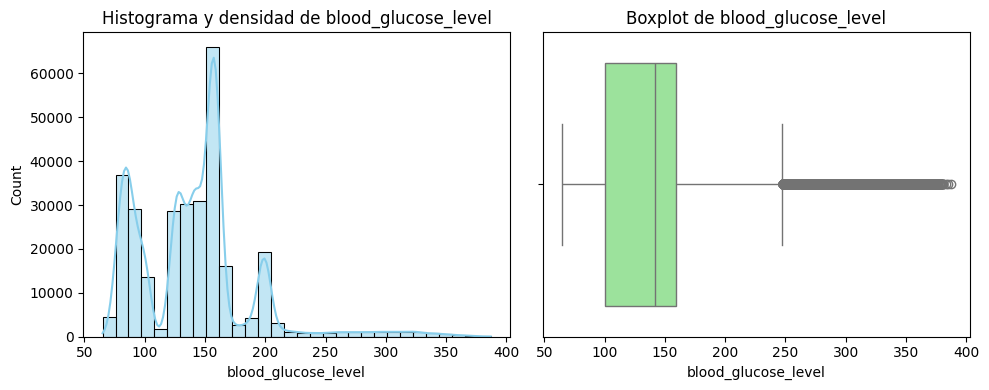


üîπ Variable: HbA1c_level
   Media = 5.58, Mediana = 5.83, Moda = 6.07
   Desviaci√≥n est√°ndar = 1.15, IQR = 1.52, CV = 0.21
   Asimetr√≠a = 0.24, Curtosis = 0.84
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


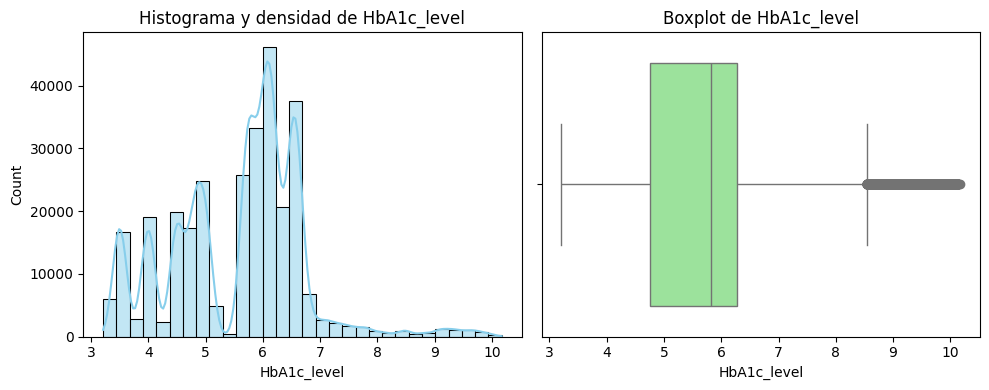


üîπ Variable: systolic_bp
   Media = 118.98, Mediana = 119.00, Moda = 123.00
   Desviaci√≥n est√°ndar = 6.30, IQR = 10.00, CV = 0.05
   Asimetr√≠a = 0.11, Curtosis = -0.73
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


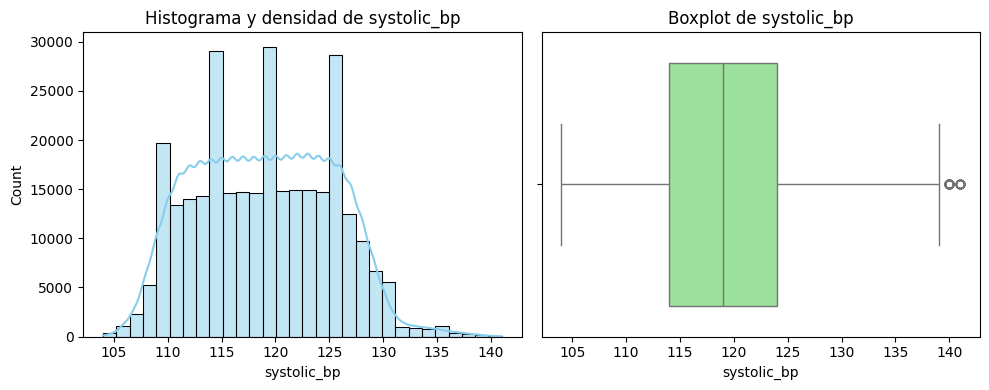


üîπ Variable: diastolic_bp
   Media = 78.81, Mediana = 79.00, Moda = 80.00
   Desviaci√≥n est√°ndar = 3.18, IQR = 5.00, CV = 0.04
   Asimetr√≠a = 0.14, Curtosis = -0.64
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


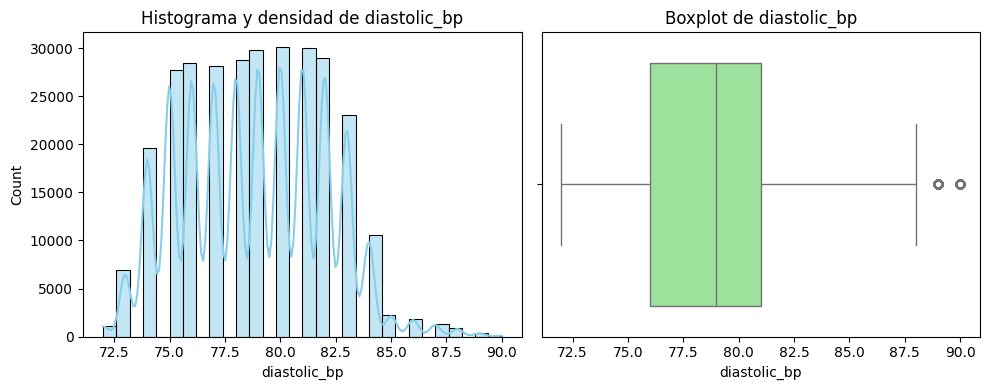


üîπ Variable: bmi
   Media = 28.02, Mediana = 27.89, Moda = 27.78
   Desviaci√≥n est√°ndar = 6.64, IQR = 5.96, CV = 0.24
   Asimetr√≠a = 1.04, Curtosis = 3.50
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


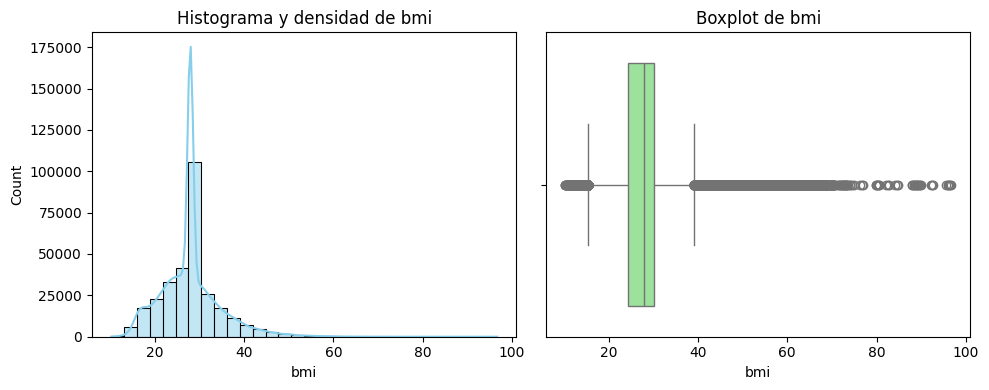


üîπ Variable: target
   Media = -0.77, Mediana = -1.00, Moda = -1.00
   Desviaci√≥n est√°ndar = 0.64, IQR = 0.00, CV = -0.84
   Asimetr√≠a = 2.85, Curtosis = 7.38
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


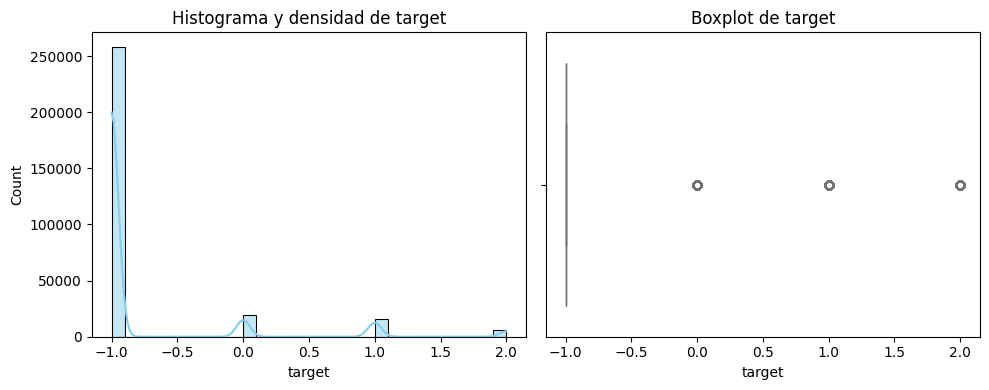


===== üìä An√°lisis de Variables Categ√≥ricas =====


üîπ Variable categ√≥rica: gender
   Frecuencia absoluta:
gender
Female    175656
Male      124290
Other         54
Name: count, dtype: int64

   Frecuencia relativa (%):
gender
Female    58.55
Male      41.43
Other      0.02
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3521082864.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)


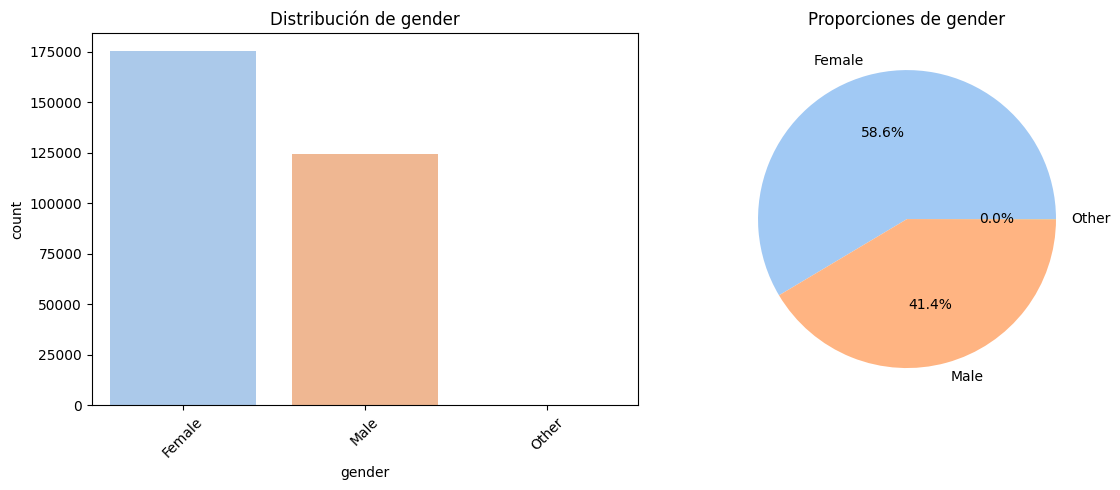

   N√∫mero de categor√≠as √∫nicas: 3

üîπ Variable categ√≥rica: smoking_history
   Frecuencia absoluta:
smoking_history
No Info        107448
never          105285
former          28056
current         27858
not current     19341
ever            12012
Name: count, dtype: int64

   Frecuencia relativa (%):
smoking_history
No Info        35.82
never          35.10
former          9.35
current         9.29
not current     6.45
ever            4.00
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3521082864.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)


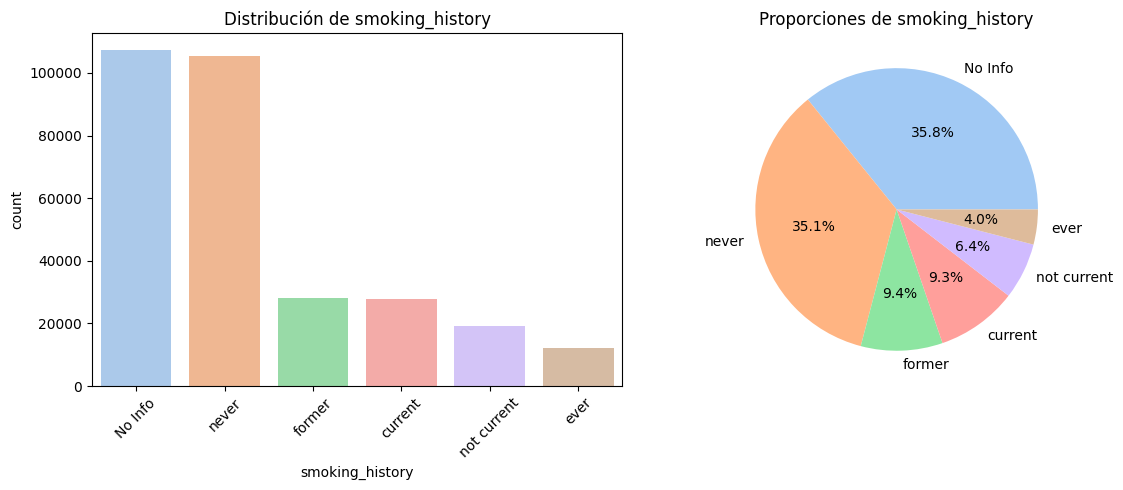

   N√∫mero de categor√≠as √∫nicas: 6


In [7]:
#1.3 An√°lisis Estad√≠stico Descriptivo

# ============================
# VARIABLES NUM√âRICAS
# ============================

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("===== üìä An√°lisis de Variables Num√©ricas =====\n")

for col in num_cols:
    print(f"\nüîπ Variable: {col}")
    
    # Estad√≠sticas de tendencia central y dispersi√≥n
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode().iloc[0]
    std = df[col].std()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    cv = std / media if media != 0 else 0
    asimetria = skew(df[col].dropna())
    curtosis = kurtosis(df[col].dropna())
    
    print(f"   Media = {media:.2f}, Mediana = {mediana:.2f}, Moda = {moda:.2f}")
    print(f"   Desviaci√≥n est√°ndar = {std:.2f}, IQR = {iqr:.2f}, CV = {cv:.2f}")
    print(f"   Asimetr√≠a = {asimetria:.2f}, Curtosis = {curtosis:.2f}")
    
    # Tests de normalidad
    shapiro_test = shapiro(df[col].dropna().sample(min(5000, len(df)), random_state=42))  # muestra para eficiencia
    ks_test = kstest(df[col].dropna(), "norm")
    
    print(f"   Shapiro-Wilk p-value = {shapiro_test.pvalue:.4f}")
    print(f"   Kolmogorov-Smirnov p-value = {ks_test.pvalue:.4f}")
    
    # Visualizaci√≥n
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma y densidad de {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()

# ============================
# VARIABLES CATEG√ìRICAS
# ============================

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\n===== üìä An√°lisis de Variables Categ√≥ricas =====\n")

for col in cat_cols:
    print(f"\nüîπ Variable categ√≥rica: {col}")
    
    frec_abs = df[col].value_counts()
    frec_rel = df[col].value_counts(normalize=True) * 100
    
    print("   Frecuencia absoluta:")
    print(frec_abs)
    print("\n   Frecuencia relativa (%):")
    print(frec_rel.round(2))
    
    # Visualizaciones
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)
    plt.title(f"Distribuci√≥n de {col}")
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    plt.pie(frec_abs, labels=frec_abs.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title(f"Proporciones de {col}")
    
    plt.tight_layout()
    plt.show()
    
    # An√°lisis de cardinalidad
    print(f"   N√∫mero de categor√≠as √∫nicas: {df[col].nunique()}")

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


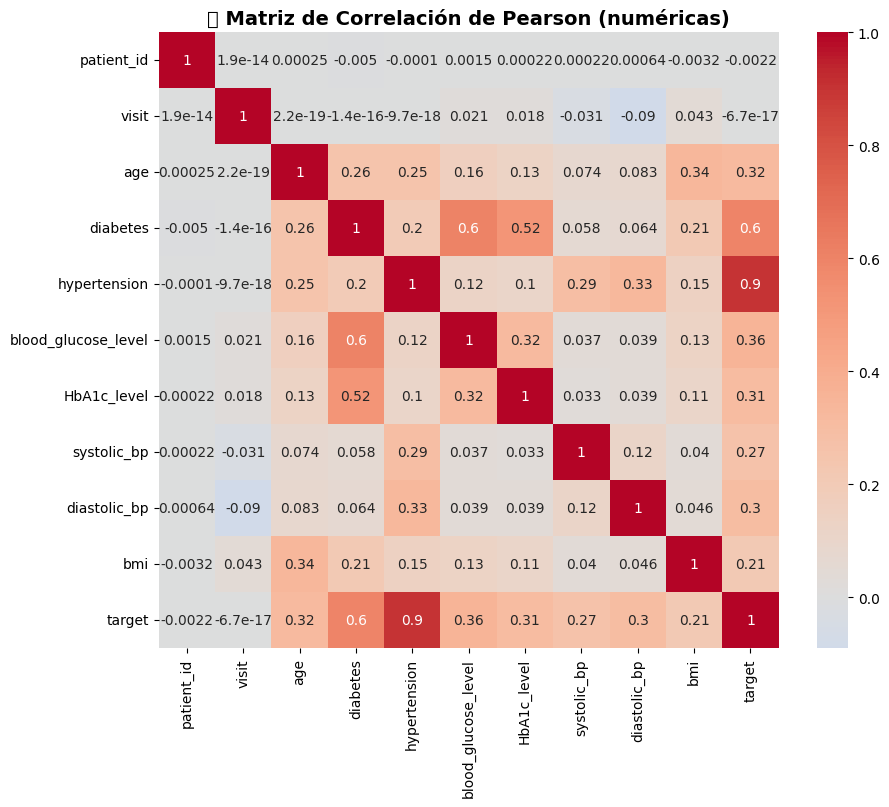

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


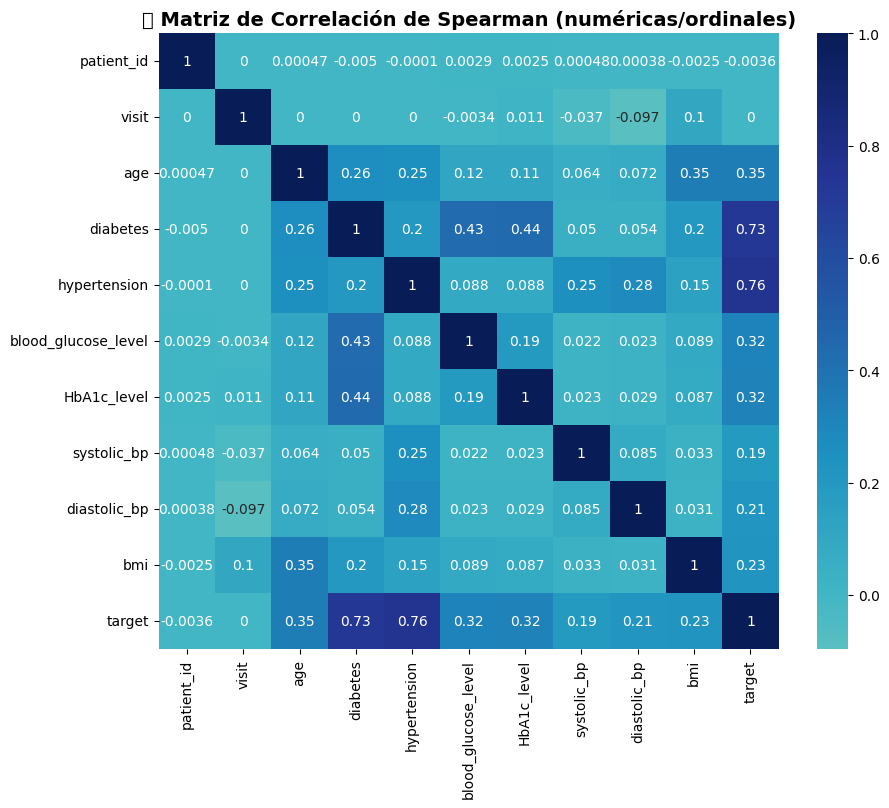


===== üìä An√°lisis de Multicolinealidad (VIF) =====
               Variable          VIF
0            patient_id     1.000078
1                 visit     1.013502
2                   age     1.219638
3              diabetes   102.864940
4          hypertension   360.276186
5   blood_glucose_level     1.569692
6           HbA1c_level     1.366230
7           systolic_bp     1.096529
8          diastolic_bp     1.134584
9                   bmi     1.156066
10               target  1137.781846


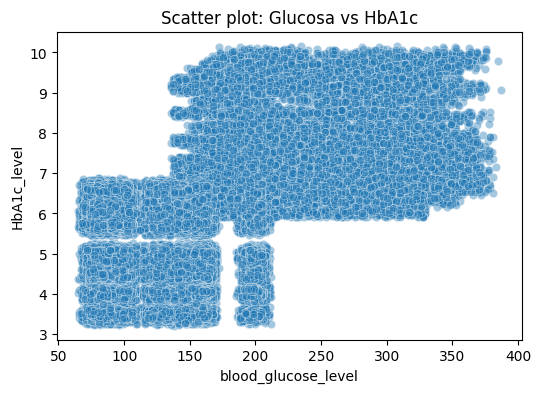

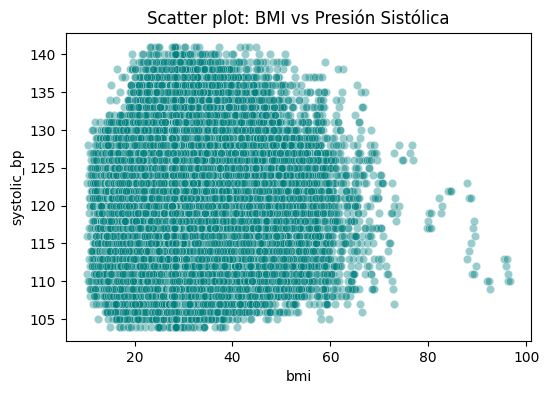

C:\Users\User\AppData\Local\Temp\ipykernel_17112\2040747895.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")


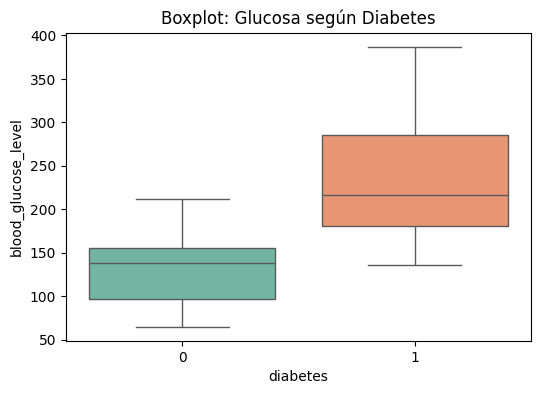

C:\Users\User\AppData\Local\Temp\ipykernel_17112\2040747895.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")


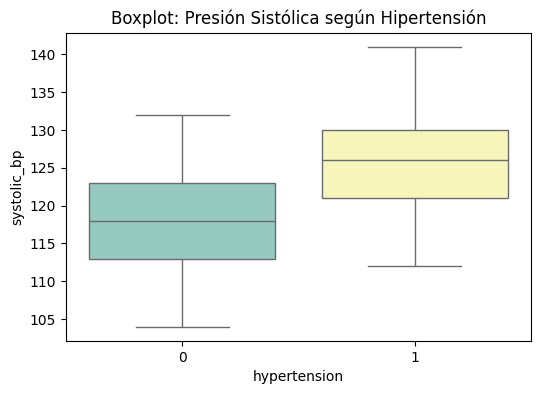

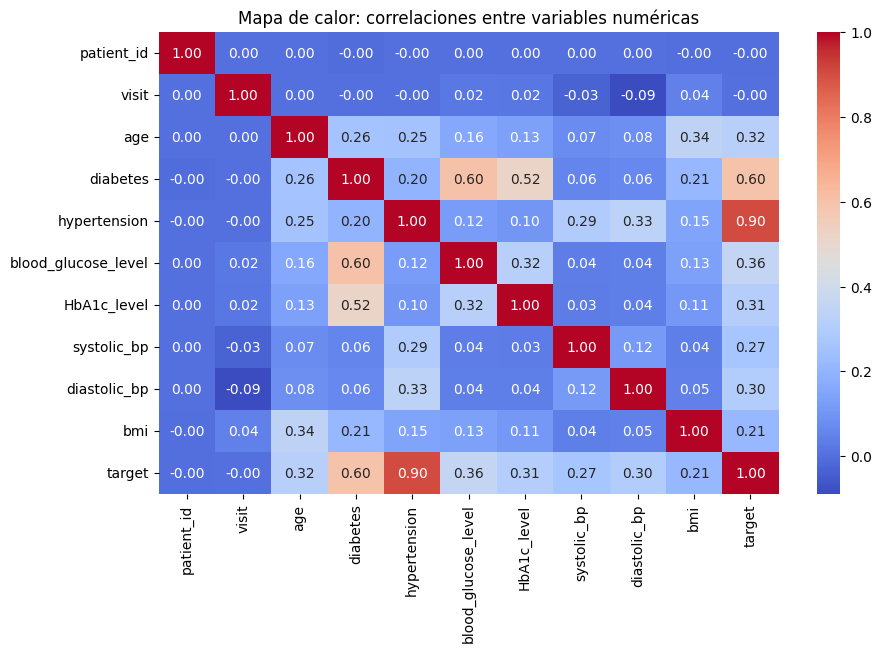

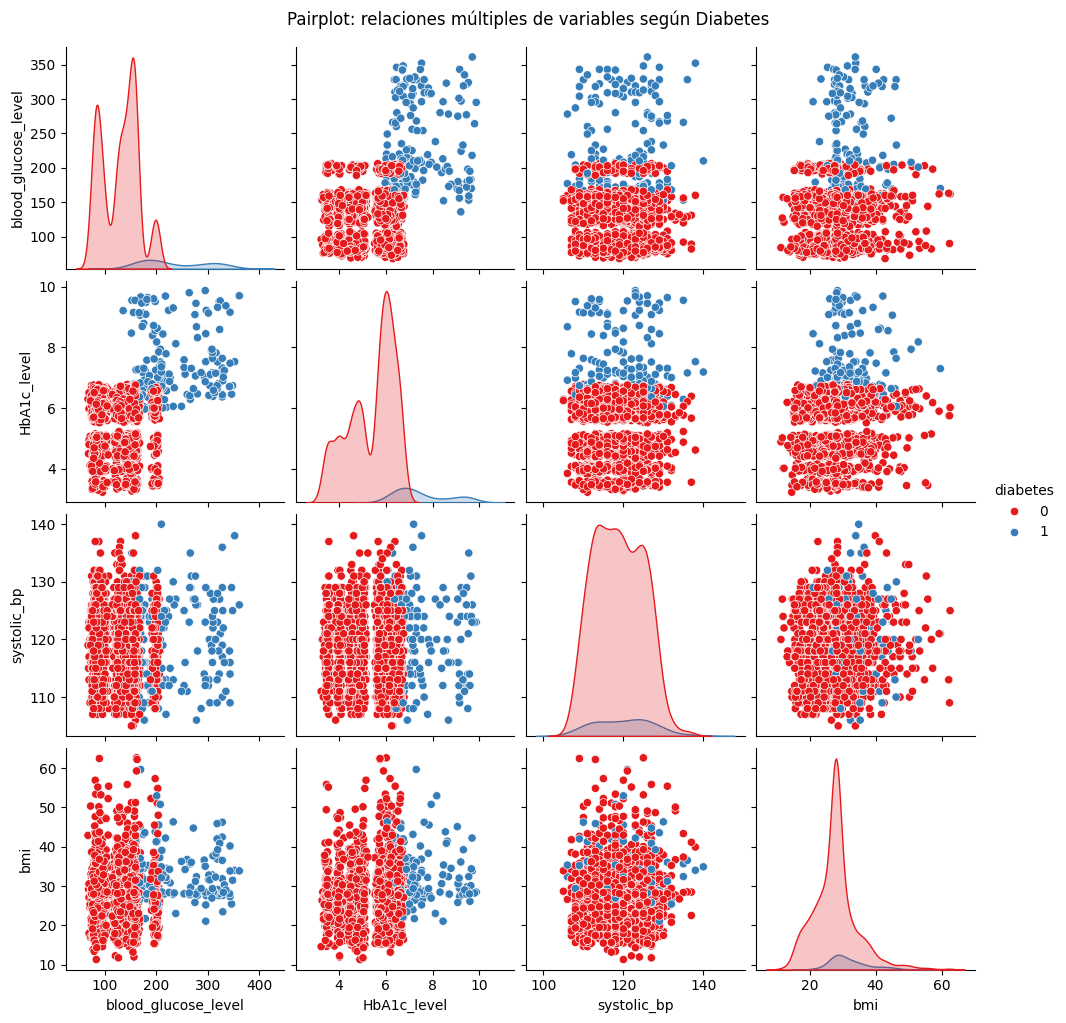

In [8]:
#1.4 An√°lisis de Relaciones y Correlaciones

# ============================
# MATRIZ DE CORRELACI√ìN (PEARSON PARA NUM√âRICAS)
# ============================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

corr_pearson = df[num_cols].corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", center=0)
plt.title("üîó Matriz de Correlaci√≥n de Pearson (num√©ricas)", fontsize=14, fontweight="bold")
plt.show()

# ============================
# CORRELACIONES DE SPEARMAN (ORDINALES / NO LINEALES)
# ============================
corr_spearman = df[num_cols].corr(method="spearman")

plt.figure(figsize=(10,8))
sns.heatmap(corr_spearman, annot=True, cmap="YlGnBu", center=0)
plt.title("üîó Matriz de Correlaci√≥n de Spearman (num√©ricas/ordinales)", fontsize=14, fontweight="bold")
plt.show()

# ============================
# AN√ÅLISIS DE MULTICOLINEALIDAD (VIF)
# ============================
print("\n===== üìä An√°lisis de Multicolinealidad (VIF) =====")
X = df[num_cols].dropna()

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# ============================
# RELACIONES BIVARIADAS
# ============================

# Scatter plot: Glucosa vs HbA1c
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.4)
plt.title("Scatter plot: Glucosa vs HbA1c")
plt.show()

# Scatter plot: BMI vs Presi√≥n Sist√≥lica
if "systolic_bp" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="bmi", y="systolic_bp", alpha=0.4, color="teal")
    plt.title("Scatter plot: BMI vs Presi√≥n Sist√≥lica")
    plt.show()

# Box plot: Glucosa seg√∫n Diabetes
if "diabetes" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")
    plt.title("Boxplot: Glucosa seg√∫n Diabetes")
    plt.show()

# Box plot: Presi√≥n Sist√≥lica seg√∫n Hipertensi√≥n
if "hypertension" in df.columns and "systolic_bp" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")
    plt.title("Boxplot: Presi√≥n Sist√≥lica seg√∫n Hipertensi√≥n")
    plt.show()

# ============================
# HEATMAP Y PAIR PLOT
# ============================

# Heatmap general
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mapa de calor: correlaciones entre variables num√©ricas")
plt.show()

# Pairplot con color por diabetes
if "diabetes" in df.columns:
    subset = df.sample(2000, random_state=42)[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "diabetes"]]
    sns.pairplot(subset, hue="diabetes", diag_kind="kde", palette="Set1")
    plt.suptitle("Pairplot: relaciones m√∫ltiples de variables seg√∫n Diabetes", y=1.02)
    plt.show()

===== üìå M√©todos Estad√≠sticos =====

üîπ Outliers detectados con Z-score (|z| > 3) por variable:
{'blood_glucose_level': 6829, 'HbA1c_level': 4304, 'systolic_bp': 437, 'diastolic_bp': 446, 'bmi': 3881, 'age': 0}

üîπ Outliers detectados con m√©todo IQR:
blood_glucose_level: 9901 casos
HbA1c_level: 5483 casos
systolic_bp: 75 casos
diastolic_bp: 446 casos
bmi: 21220 casos
age: 0 casos

===== üìå M√©todos de Machine Learning =====


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


üîπ Isolation Forest: % de outliers detectados = 2.0
üîπ Local Outlier Factor: % de outliers detectados = 2.0


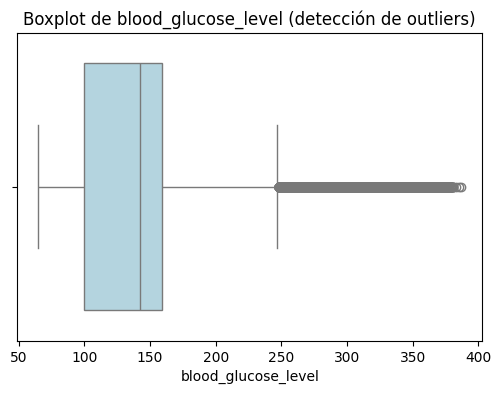

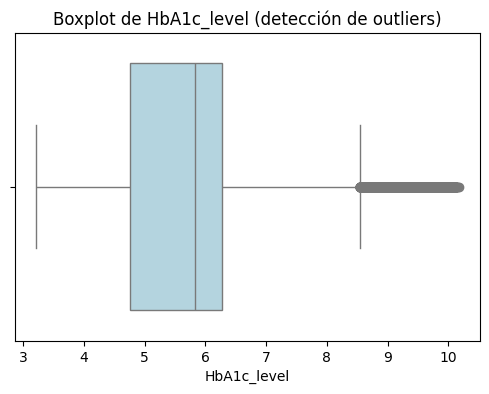

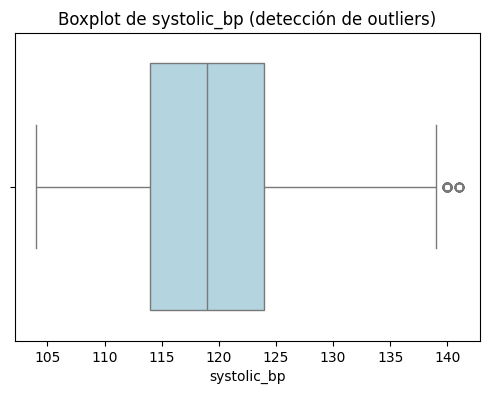

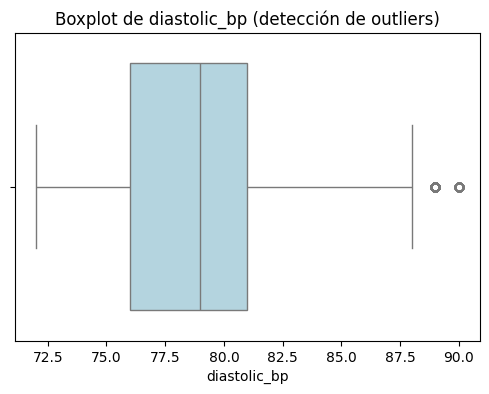

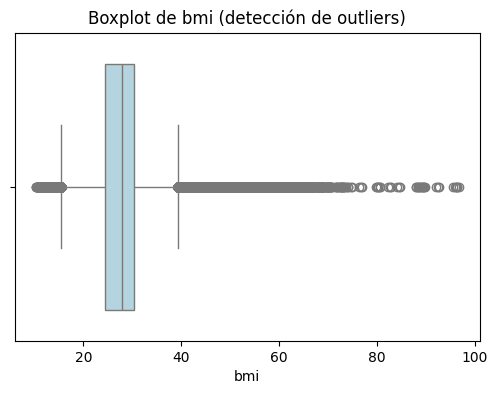

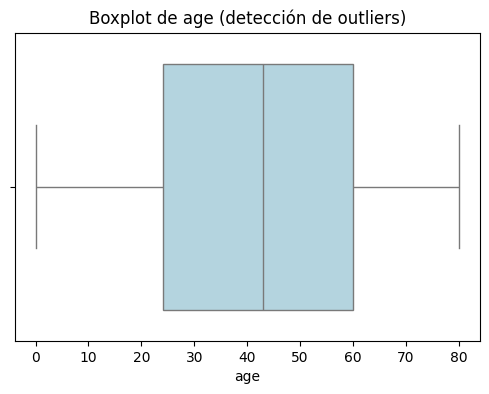

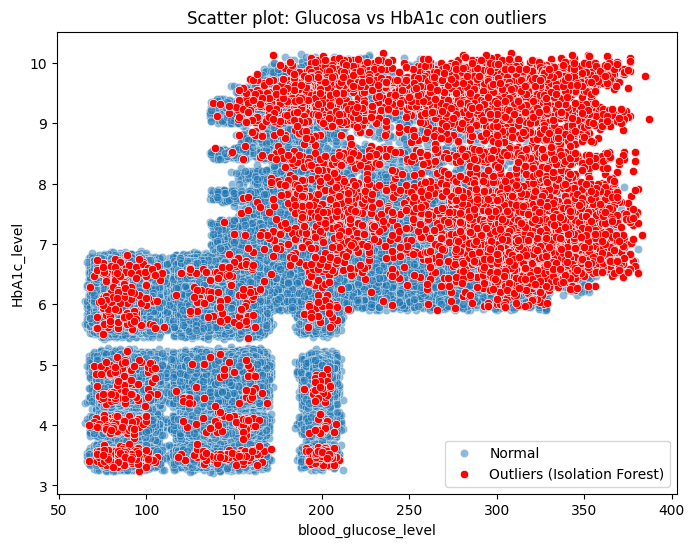


===== üìå An√°lisis de Impacto de Outliers =====
blood_glucose_level: media original = 140.47, media sin outliers = 137.91
HbA1c_level: media original = 5.58, media sin outliers = 5.53
systolic_bp: media original = 118.98, media sin outliers = 118.92
diastolic_bp: media original = 78.81, media sin outliers = 78.77
bmi: media original = 28.02, media sin outliers = 27.84
age: media original = 41.89, media sin outliers = 41.54

===== üìå Impacto de Outliers en la variable target =====
Distribuci√≥n original de clases (%):
 target
-1    86.10
 0     6.41
 1     5.40
 2     2.09
Name: proportion, dtype: float64

Distribuci√≥n sin outliers (%):
 target
-1    87.70
 0     5.46
 1     5.38
 2     1.47
Name: proportion, dtype: float64


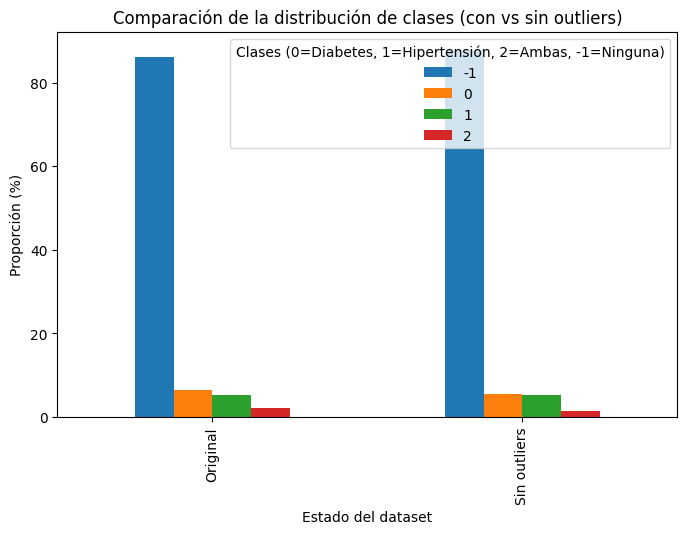

In [10]:
#1.5 Detecci√≥n de Anomal√≠as y Outliers

# Seleccionar variables num√©ricas predictoras
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# ============================
# M√âTODOS ESTAD√çSTICOS
# ============================

print("===== üìå M√©todos Estad√≠sticos =====")

# Z-score
z_scores = np.abs(zscore(df[num_cols]))
outliers_z = (z_scores > 3).sum()
print("\nüîπ Outliers detectados con Z-score (|z| > 3) por variable:")
print(dict(zip(num_cols, outliers_z)))

# M√©todo IQR
print("\nüîπ Outliers detectados con m√©todo IQR:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} casos")

# ============================
# M√âTODOS BASADOS EN ML
# ============================

print("\n===== üìå M√©todos de Machine Learning =====")

# Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df["iso_outlier"] = iso.fit_predict(df[num_cols])
print("üîπ Isolation Forest: % de outliers detectados =", (df["iso_outlier"] == -1).mean() * 100)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df["lof_outlier"] = lof.fit_predict(df[num_cols])
print("üîπ Local Outlier Factor: % de outliers detectados =", (df["lof_outlier"] == -1).mean() * 100)

# ============================
# VISUALIZACIONES DE OUTLIERS
# ============================

# Boxplots para cada variable
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot de {col} (detecci√≥n de outliers)")
    plt.show()

# Scatter plot con outliers destacados (Glucosa vs HbA1c)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.5, label="Normal")
sns.scatterplot(data=df[df["iso_outlier"] == -1], x="blood_glucose_level", y="HbA1c_level", 
                color="red", label="Outliers (Isolation Forest)")
plt.title("Scatter plot: Glucosa vs HbA1c con outliers")
plt.legend()
plt.show()

# ============================
# AN√ÅLISIS DE IMPACTO EN VARIABLES Y EN EL TARGET
# ============================

print("\n===== üìå An√°lisis de Impacto de Outliers =====")
for col in num_cols:
    media_original = df[col].mean()
    media_sin_outliers = df.loc[df["iso_outlier"] != -1, col].mean()
    print(f"{col}: media original = {media_original:.2f}, media sin outliers = {media_sin_outliers:.2f}")

# Impacto en distribuci√≥n de clases target
print("\n===== üìå Impacto de Outliers en la variable target =====")
dist_original = df["target"].value_counts(normalize=True) * 100
dist_filtrada = df.loc[df["iso_outlier"] != -1, "target"].value_counts(normalize=True) * 100

print("Distribuci√≥n original de clases (%):\n", dist_original.round(2))
print("\nDistribuci√≥n sin outliers (%):\n", dist_filtrada.round(2))

# Visualizaci√≥n comparativa
dist_df = pd.DataFrame({
    "Original": dist_original,
    "Sin outliers": dist_filtrada
}).T

dist_df.plot(kind="bar", figsize=(8,5))
plt.title("Comparaci√≥n de la distribuci√≥n de clases (con vs sin outliers)")
plt.xlabel("Estado del dataset")
plt.ylabel("Proporci√≥n (%)")
plt.legend(title="Clases (0=Diabetes, 1=Hipertensi√≥n, 2=Ambas, -1=Ninguna)")
plt.show()


===== üìä Distribuci√≥n de Clases (Clasificaci√≥n) =====
target
-1    258309
 0     19236
 1     16191
 2      6264
Name: count, dtype: int64

Proporciones (%):
target
-1    86.10
 0     6.41
 1     5.40
 2     2.09
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


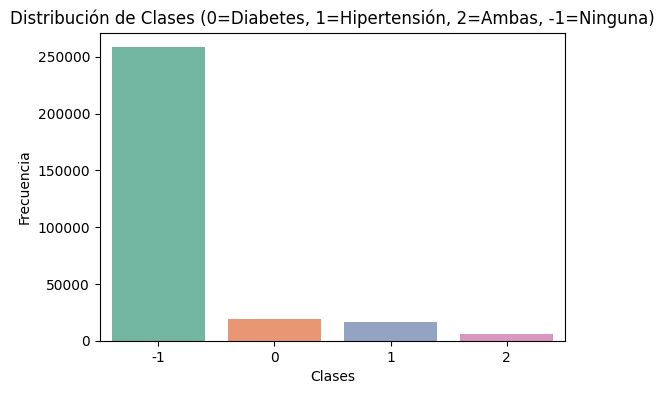

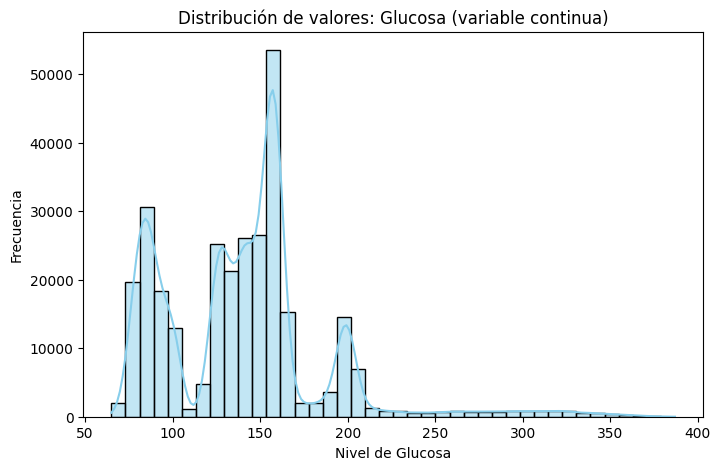


===== üìå An√°lisis de Desbalance =====
Clase -1: 258309 registros (86.10%)
Clase 0: 19236 registros (6.41%)
Clase 1: 16191 registros (5.40%)
Clase 2: 6264 registros (2.09%)

üí° Nota: Si una clase es <10% del total, se considera desbalanceada.


C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="blood_glucose_level", data=df, palette="pastel")


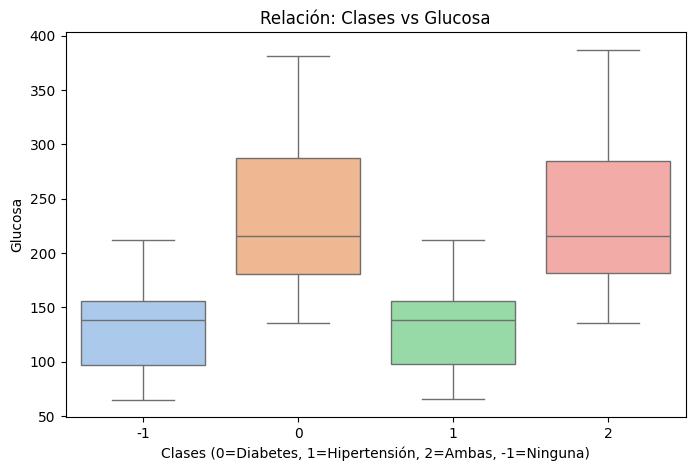

C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="systolic_bp", data=df, palette="muted")


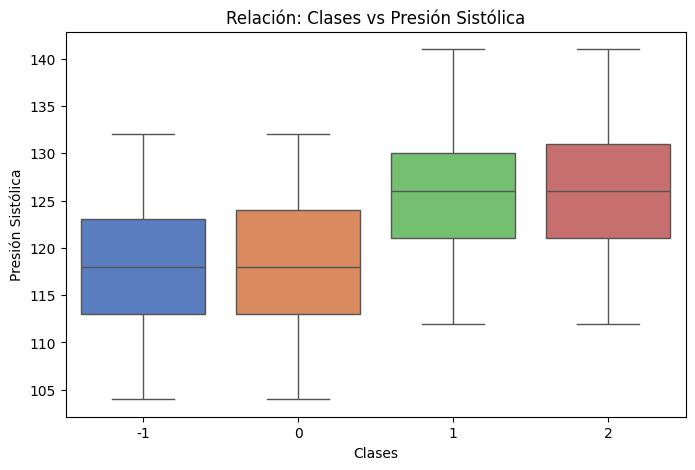

C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="bmi", data=df, palette="coolwarm")


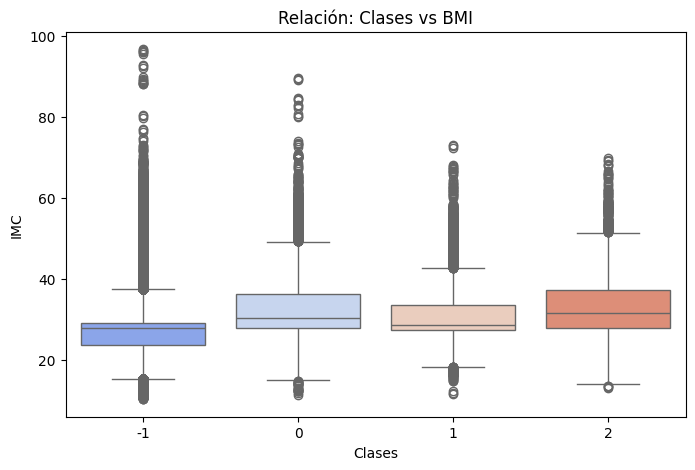

In [9]:
#1.6 An√°lisis de la Variable Objetivo
# ============================
# CREAR VARIABLE MULTICLASE (3 CASOS)
# ============================
def assign_label(row):
    if row["diabetes"] == 1 and row["hypertension"] == 1:
        return 2   # Ambas
    elif row["diabetes"] == 1:
        return 0   # Solo diabetes
    elif row["hypertension"] == 1:
        return 1   # Solo hipertensi√≥n
    else:
        return -1  # Ninguna enfermedad (opcional)

df["target"] = df.apply(assign_label, axis=1)

# ============================
# DISTRIBUCI√ìN DE CLASES (CLASIFICACI√ìN)
# ============================
print("===== üìä Distribuci√≥n de Clases (Clasificaci√≥n) =====")
print(df["target"].value_counts())
print("\nProporciones (%):")
print((df["target"].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Distribuci√≥n de Clases (0=Diabetes, 1=Hipertensi√≥n, 2=Ambas, -1=Ninguna)")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

# ============================
# DISTRIBUCI√ìN DE VALORES (REGRESI√ìN EJEMPLO: GLUCOSA)
# ============================
plt.figure(figsize=(8,5))
sns.histplot(df["blood_glucose_level"], bins=40, kde=True, color="skyblue")
plt.title("Distribuci√≥n de valores: Glucosa (variable continua)")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Frecuencia")
plt.show()

# ============================
# AN√ÅLISIS DE DESBALANCE
# ============================
print("\n===== üìå An√°lisis de Desbalance =====")
total = len(df)
for clase, count in df["target"].value_counts().items():
    pct = (count / total) * 100
    print(f"Clase {clase}: {count} registros ({pct:.2f}%)")

print("\nüí° Nota: Si una clase es <10% del total, se considera desbalanceada.")

# ============================
# RELACI√ìN CON VARIABLES PREDICTORAS
# ============================

# Boxplot: Glucosa vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="blood_glucose_level", data=df, palette="pastel")
plt.title("Relaci√≥n: Clases vs Glucosa")
plt.xlabel("Clases (0=Diabetes, 1=Hipertensi√≥n, 2=Ambas, -1=Ninguna)")
plt.ylabel("Glucosa")
plt.show()

# Boxplot: Presi√≥n Sist√≥lica vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="systolic_bp", data=df, palette="muted")
plt.title("Relaci√≥n: Clases vs Presi√≥n Sist√≥lica")
plt.xlabel("Clases")
plt.ylabel("Presi√≥n Sist√≥lica")
plt.show()

# Boxplot: BMI vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="bmi", data=df, palette="coolwarm")
plt.title("Relaci√≥n: Clases vs BMI")
plt.xlabel("Clases")
plt.ylabel("IMC")
plt.show()


### 2.1 Tratamiento de Valores Faltantes

**Hallazgos iniciales:**  
El dataset est√° fuertemente desbalanceado (‚âà90% clase ‚Äúsin enfermedad‚Äù), lo que genera riesgo de sesgo en el modelo si no se corrige. Adem√°s, los datos originales solo representan una √∫nica medici√≥n por paciente, sin seguimiento temporal ni continuidad en algunas variables cl√≠nicas.

**Estrategia aplicada:**  
- **Imputaci√≥n sint√©tica guiada por reglas m√©dico-realistas:**  
  - Se generaron **visitas cl√≠nicas sint√©ticas** para cada paciente, simulando un seguimiento temporal.  
  - A partir del diagn√≥stico inicial (diabetes, hipertensi√≥n o ambas), se proyectaron valores progresivos de glucosa, HbA1c, presi√≥n arterial y BMI, siguiendo el comportamiento cl√≠nico esperado de pacientes cr√≥nicos.  
  - Para reflejar variabilidad fisiol√≥gica individual, se incorpor√≥ variaci√≥n aleatoria controlada mediante funciones como `np.random.uniform()`, manteniendo los resultados dentro de rangos cl√≠nicamente v√°lidos.  
  - Esta t√©cnica no sustituye datos faltantes exactos, pero permite **completar secuencias temporales realistas**, facilitando el an√°lisis de series de tiempo y entrenamientos de modelos din√°micos.

- **Series de tiempo:**  
  La estrategia de imputaci√≥n sint√©tica convirti√≥ un dataset tabular est√°tico en un dataset longitudinal con varias visitas por paciente, permitiendo aplicar modelos de predicci√≥n que capturen la evoluci√≥n cl√≠nica.

- **Creaci√≥n de variable `target`:**  
  Dado que los algoritmos cl√°sicos manejan **una √∫nica salida** y nuestro inter√©s es predecir tres condiciones posibles (diabetes, hipertensi√≥n, ambas), se cre√≥ la variable `target` como etiqueta multiclase.  
  - `0 = diabetes`  
  - `1 = hipertensi√≥n`  
  - `2 = ambas enfermedades`  
  - `-1 = ninguna` (opcional)  

**Conclusi√≥n:**  
El uso de imputaci√≥n sint√©tica temporal + creaci√≥n del `target` permiti√≥:  
1. Representar mejor la din√°mica cl√≠nica.  
2. Preparar el dataset para algoritmos de clasificaci√≥n multiclase.  
3. Reducir el impacto del desbalance extremo en la distribuci√≥n original.


### 2.2 Tratamiento de Outliers

**Detecci√≥n automatizada:**  
En la fase exploratoria se aplicaron varios m√©todos para identificar valores at√≠picos en variables cr√≠ticas como glucosa, HbA1c, presi√≥n arterial y BMI:  
- **M√©todos estad√≠sticos:** Z-score (|z|>3) e IQR (fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]).  
- **M√©todos de machine learning:** Isolation Forest y Local Outlier Factor (LOF), que detectan observaciones poco probables en funci√≥n de m√∫ltiples variables.  
- **Visualizaciones:** Boxplots y scatter plots que evidenciaron valores extremos, como glucosa > 400 mg/dL o HbA1c > 14%, cl√≠nicamente improbables.

**Estrategias de tratamiento:**  
- **Eliminaci√≥n:**  
  Registros con valores fuera de los rangos cl√≠nicamente posibles (ej. presi√≥n sist√≥lica < 70 o > 250 mmHg) se consideran errores de captura y pueden eliminarse.  
- **Transformaci√≥n (Winsorizing / Capping):**  
  Valores extremos pero plausibles se ajustan mediante winsorizing, limit√°ndolos al percentil 1 y 99, para reducir su impacto en la media sin perder informaci√≥n.  
- **Tratamiento como categor√≠a separada:**  
  En casos donde un valor extremo refleja una condici√≥n cl√≠nica real (ej. HbA1c extremadamente alto en diab√©ticos descompensados), se mantiene como categor√≠a especial, etiquetada como ‚Äúalto riesgo‚Äù.

**Conclusi√≥n:**  
El tratamiento de outliers se adapt√≥ seg√∫n el contexto:  
- Se eliminaron datos imposibles.  
- Se ajustaron valores extremos para mejorar la estabilidad del modelo.  
- Se preservaron valores cl√≠nicamente v√°lidos, reconociendo que en medicina los ‚Äúoutliers‚Äù pueden representar casos cr√≠ticos y no necesariamente errores.  
Esta estrategia balancea la **validez estad√≠stica** con la **relevancia cl√≠nica**, preparando un dataset robusto para los modelos de predicci√≥n.


In [11]:


# ============================
# 2.2 Tratamiento de Outliers
# ============================

# 1. Winsorizing (capping en percentiles 1 y 99)
df_winsor = df.copy()
for col in ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi"]:
    lower, upper = np.percentile(df[col], [1, 99])
    df_winsor[col] = np.clip(df[col], lower, upper)

print("‚úÖ Winsorizing aplicado (valores extremos ajustados a percentiles 1 y 99).")

# 2. Eliminaci√≥n de valores cl√≠nicamente imposibles
df_clean = df_winsor[
    (df_winsor["systolic_bp"].between(70, 250)) &
    (df_winsor["diastolic_bp"].between(40, 150)) &
    (df_winsor["HbA1c_level"].between(3, 15)) &
    (df_winsor["blood_glucose_level"].between(50, 450))
]

print("‚úÖ Registros imposibles eliminados. Filas restantes:", len(df_clean))

# 3. Marcar outliers como categor√≠a separada
df_clean["glucose_outlier_flag"] = np.where(df["blood_glucose_level"] > 300, 1, 0)
print("‚úÖ Bandera de 'alto riesgo glucosa' creada.")

‚úÖ Winsorizing aplicado (valores extremos ajustados a percentiles 1 y 99).
‚úÖ Registros imposibles eliminados. Filas restantes: 300000
‚úÖ Bandera de 'alto riesgo glucosa' creada.


### 2.3 Estandarizaci√≥n de Formatos

**Tipos de datos correctos:**  
- Se verific√≥ que las variables num√©ricas (`glucosa`, `HbA1c`, `systolic_bp`, `diastolic_bp`, `BMI`, `age`) est√©n en formato `float` o `int`.  
- Variables categ√≥ricas como `gender`, `smoking_history` y la variable objetivo `target` se convirtieron a tipo `category` para optimizar memoria y mejorar interpretabilidad.  

**Consistencia en categor√≠as:**  
- Se normalizaron los valores de `gender` para que solo existan: `Male`, `Female`, `Other`.  
- En `smoking_history` se unificaron categor√≠as redundantes (ejemplo: `not current` ‚Üí `former`).  
- Se elimin√≥ la categor√≠a `No Info` en caso de ser demasiado frecuente, o se imput√≥ con la moda si representaba un porcentaje bajo.  

**Normalizaci√≥n de texto:**  
- Se eliminaron espacios en blanco y se estandariz√≥ todo el texto en min√∫sculas para evitar duplicaci√≥n de categor√≠as.  
  Ejemplo: `Male`, `male`, `MALE` ‚Üí `male`.  

**Formato de fechas:**  
- Si bien el dataset original no conten√≠a fechas expl√≠citas, se generaron fechas sint√©ticas a partir de la columna `visit`, simulando intervalos cl√≠nicos regulares (ej. visitas cada 6 meses).  
- Esto permiti√≥ organizar los datos como **series de tiempo** y habilitar an√°lisis longitudinales.  

**Conclusi√≥n:**  
La estandarizaci√≥n de formatos asegura que los datos sean consistentes, comparables y aptos para algoritmos de machine learning, evitando errores comunes derivados de inconsistencias en categor√≠as o tipos de datos.


In [12]:
# ============================
# 2.3 Estandarizaci√≥n de Formatos
# ============================

# 1. Tipos de datos correctos
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]
cat_cols = ["gender", "smoking_history", "target"]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df[cat_cols] = df[cat_cols].astype("category")

print("‚úÖ Tipos de datos estandarizados.")

# 2. Consistencia en categor√≠as
df["gender"] = df["gender"].str.strip().str.lower().replace({
    "male": "male",
    "female": "female",
    "other": "other"
})

df["smoking_history"] = df["smoking_history"].str.strip().str.lower().replace({
    "not current": "former"
})

print("‚úÖ Categor√≠as normalizadas en 'gender' y 'smoking_history'.")

# 3. Normalizaci√≥n de texto (min√∫sculas, sin espacios extra)
for col in ["gender", "smoking_history"]:
    df[col] = df[col].astype(str).str.lower().str.strip()

print("‚úÖ Texto normalizado en variables categ√≥ricas.")

# 4. Formato de fechas (sint√©tico a partir de visitas)
if "visit" in df.columns:
    df["visit_date"] = pd.to_datetime("2020-01-01") + pd.to_timedelta(df["visit"]*180, unit="D")
    print("‚úÖ Fechas sint√©ticas generadas para visitas cl√≠nicas.")

‚úÖ Tipos de datos estandarizados.
‚úÖ Categor√≠as normalizadas en 'gender' y 'smoking_history'.
‚úÖ Texto normalizado en variables categ√≥ricas.
‚úÖ Fechas sint√©ticas generadas para visitas cl√≠nicas.


In [19]:
#2.4 Pipeline Automatizado

class DataCleaner:
    def __init__(self, missing_strategy="median", outlier_strategy="isoforest", create_target=True):
        self.missing_strategy = missing_strategy
        self.outlier_strategy = outlier_strategy
        self.create_target = create_target
        self.imputer = None
        self.iso = None

    def fit(self, X, y=None):
        df = X.copy()

        # --- Imputador de valores faltantes ---
        if self.missing_strategy in ["mean", "median", "most_frequent"]:
            self.imputer = SimpleImputer(strategy=self.missing_strategy)
            num_cols = df.select_dtypes(include=np.number).columns
            self.imputer.fit(df[num_cols])

        # --- Isolation Forest para outliers ---
        if self.outlier_strategy == "isoforest":
            num_cols = df.select_dtypes(include=np.number).columns
            self.iso = IsolationForest(contamination=0.02, random_state=42)
            self.iso.fit(df[num_cols].fillna(0))

        return self

    def transform(self, X):
        df = X.copy()

        # --- Crear target si no existe ---
        if self.create_target and "target" not in df.columns:
            def assign_label(row):
                if row["diabetes"] == 1 and row["hypertension"] == 1:
                    return 2
                elif row["diabetes"] == 1:
                    return 0
                elif row["hypertension"] == 1:
                    return 1
                else:
                    return -1
            df["target"] = df.apply(assign_label, axis=1)

        # --- Imputaci√≥n ---
        if self.imputer is not None:
            num_cols = df.select_dtypes(include=np.number).columns
            df[num_cols] = self.imputer.transform(df[num_cols])

        # --- Detecci√≥n de outliers ---
        if self.iso is not None:
            num_cols = df.select_dtypes(include=np.number).columns
            df["outlier_flag"] = self.iso.predict(df[num_cols])
            df = df[df["outlier_flag"] == 1]  # conservar solo los normales
            df = df.drop(columns=["outlier_flag"])

        return df

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)



In [20]:
# =======================
# Uso del Pipeline
# =======================

# 1. Cargar dataset
df = pd.read_csv("dataset_timeseries_realista_con_target.csv")

# 2. Crear pipeline
cleaner = DataCleaner(missing_strategy="median", outlier_strategy="isoforest", create_target=True)

# 3. Aplicar pipeline
df_clean = cleaner.fit_transform(df)

# 4. Resultados
print("‚úÖ Dataset limpio y preprocesado")
print("Shape final:", df_clean.shape)
print("Columnas disponibles:", df_clean.columns.tolist()[:10])
print(df_clean.head())

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


‚úÖ Dataset limpio y preprocesado
Shape final: (294000, 13)
Columnas disponibles: ['patient_id', 'visit', 'age', 'gender', 'smoking_history', 'diabetes', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'systolic_bp']
   patient_id  visit   age  gender smoking_history  diabetes  hypertension  \
0         0.0    1.0  80.0  Female           never       0.0           0.0   
1         0.0    2.0  80.0  Female           never       0.0           0.0   
2         0.0    3.0  80.0  Female           never       0.0           0.0   
3         1.0    1.0  54.0  Female         No Info       0.0           0.0   
4         1.0    2.0  54.0  Female         No Info       0.0           0.0   

   blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp    bmi  target  
0                136.0         6.69        124.0          76.0  25.54    -1.0  
1                137.0         6.78        123.0          76.0  25.79    -1.0  
2                139.0         6.74        122.0          75.0  26.2

3. Feature Engineering Avanzado - 

In [21]:
# 3.1 CREACI√ìN DE VARIABLES DERIVADAS
# ====================================================

# 1. Variables de interacci√≥n -----------------------------
# Ejemplo: combinaci√≥n de glucosa y HbA1c
df_clean["glucose_hba1c_ratio"] = df_clean["blood_glucose_level"] / (df_clean["HbA1c_level"] + 1e-6)

# Ejemplo: interacci√≥n entre BMI y edad
df_clean["bmi_age_interaction"] = df_clean["bmi"] * df_clean["age"]

# Ejemplo: interacci√≥n entre presi√≥n sist√≥lica y diast√≥lica (presi√≥n de pulso)
df_clean["pulse_pressure"] = df_clean["systolic_bp"] - df_clean["diastolic_bp"]

# 2. Transformaciones matem√°ticas -------------------------
# Log-transform (para variables sesgadas)
df_clean["glucose_log"] = np.log1p(df_clean["blood_glucose_level"])  # log(1+x)
df_clean["bmi_sqrt"] = np.sqrt(df_clean["bmi"])                      # ra√≠z cuadrada

# Polinomial: cuadrado de HbA1c
df_clean["hba1c_squared"] = df_clean["HbA1c_level"] ** 2

# 3. Binning y discretizaci√≥n ------------------------------
# Ejemplo: discretizar edad en grupos
df_clean["age_bin"] = pd.cut(
    df_clean["age"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0-20", "21-40", "41-60", "61-80", "81-100"]
)

# Ejemplo: discretizar BMI en categor√≠as (OMS)
df_clean["bmi_category"] = pd.cut(
    df_clean["bmi"],
    bins=[0, 18.5, 25, 30, 35, 100],
    labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad I", "Obesidad II+"]
)

# 4. Agregaciones temporales (si aplica) -------------------
# Promedio de glucosa por paciente a lo largo de las visitas
df_clean["glucose_patient_mean"] = df_clean.groupby("patient_id")["blood_glucose_level"].transform("mean")

# √öltimo valor de HbA1c por paciente (simulando seguimiento cl√≠nico)
df_clean["hba1c_last"] = df_clean.groupby("patient_id")["HbA1c_level"].transform("last")

# ====================================================
# Revisar dataset con nuevas variables
# ====================================================
print("‚úÖ Nuevas variables derivadas creadas")
print(df_clean.head(10).T)  # muestra transpuesta para ver nuevas columnas

‚úÖ Nuevas variables derivadas creadas
                               0           1           2          3  \
patient_id                   0.0         0.0         0.0        1.0   
visit                        1.0         2.0         3.0        1.0   
age                         80.0        80.0        80.0       54.0   
gender                    Female      Female      Female     Female   
smoking_history            never       never       never    No Info   
diabetes                     0.0         0.0         0.0        0.0   
hypertension                 0.0         0.0         0.0        0.0   
blood_glucose_level        136.0       137.0       139.0       83.0   
HbA1c_level                 6.69        6.78        6.74       6.65   
systolic_bp                124.0       123.0       122.0      122.0   
diastolic_bp                76.0        76.0        75.0       78.0   
bmi                        25.54       25.79       26.24      27.53   
target                      -1.0      

In [24]:
# ====================================================
# 3.2 ENCODING DE VARIABLES CATEG√ìRICAS
# ====================================================



# Seleccionar columnas categ√≥ricas
cat_cols = ["gender", "smoking_history", "age_bin", "bmi_category"]

# ====================================================
# 1. One-Hot Encoding (variables ficticias 0/1)
# ====================================================
df_onehot = pd.get_dummies(df_clean[cat_cols], drop_first=True, prefix=cat_cols)
print("‚úÖ One-Hot Encoding creado:", df_onehot.shape)

# ====================================================
# 2. Label Encoding (categor√≠as ‚Üí enteros)
# ====================================================
df_label = df_clean[cat_cols].copy()
le = LabelEncoder()
for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col].astype(str))
print("‚úÖ Label Encoding aplicado:\n", df_label.head())

# ====================================================
# 3. Target Encoding (categor√≠as ‚Üí media de la variable objetivo)
# ====================================================
target_enc = ce.TargetEncoder(cols=cat_cols)
df_target = target_enc.fit_transform(df_clean[cat_cols], df_clean["target"])
print("‚úÖ Target Encoding aplicado:\n", df_target.head())

# ====================================================
# 4. Binary Encoding (categor√≠as ‚Üí binario)
# ====================================================
binary_enc = ce.BinaryEncoder(cols=cat_cols)
df_binary = binary_enc.fit_transform(df_clean[cat_cols])
print("‚úÖ Binary Encoding aplicado:", df_binary.shape)

# ====================================================
# 5. Frequency Encoding (categor√≠as ‚Üí frecuencia relativa)
# ====================================================
df_freq = df_clean[cat_cols].copy()
for col in cat_cols:
    freq_map = df_freq[col].value_counts(normalize=True)
    df_freq[col] = df_freq[col].map(freq_map)
print("‚úÖ Frequency Encoding aplicado:\n", df_freq.head())

# ====================================================
# Combinar resultados de ejemplo
# ====================================================
print("\nEjemplo de comparaci√≥n entre m√©todos para 'smoking_history':")
print("Original:", df_clean["smoking_history"].unique()[:5])
print("OneHot:", df_onehot.filter(like="smoking_history").head(3))
print("Label:", df_label["smoking_history"].head(3).tolist())
print("Target:", df_target["smoking_history"].head(3).tolist())
print("Binary:", df_binary.filter(like="smoking_history").head(3))
print("Frequency:", df_freq["smoking_history"].head(3).tolist())

‚úÖ One-Hot Encoding creado: (294000, 15)
‚úÖ Label Encoding aplicado:
    gender  smoking_history  age_bin  bmi_category
0       0                4        3             4
1       0                4        3             4
2       0                4        3             4
3       0                0        2             4
4       0                0        2             4
‚úÖ Target Encoding aplicado:
      gender  smoking_history   age_bin  bmi_category
0 -0.826466        -0.781558 -0.560839     -0.826073
1 -0.826466        -0.781558 -0.560839     -0.826073
2 -0.826466        -0.781558 -0.560839     -0.826073
3 -0.826466        -0.910473 -0.765094     -0.826073
4 -0.826466        -0.910473 -0.765094     -0.826073
‚úÖ Binary Encoding aplicado: (294000, 11)
‚úÖ Frequency Encoding aplicado:
      gender  smoking_history   age_bin bmi_category
0  0.585939         0.349289  0.229194      0.46534
1  0.585939         0.349289  0.229194      0.46534
2  0.585939         0.349289  0.229194      0.

In [26]:
# ====================================================
# 3.3 TRANSFORMACIONES DE VARIABLES NUM√âRICAS
# ====================================================

# Seleccionar variables num√©ricas relevantes
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Copia del dataset solo con num√©ricas
df_num = df_clean[num_cols].copy()

# ====================================================
# 1. Normalizaci√≥n (Min-Max Scaling)
# Escala todas las variables al rango [0,1]
# ====================================================
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_num), columns=num_cols)
print("‚úÖ Min-Max Scaling aplicado:\n", df_minmax.head())

# ====================================================
# 2. Estandarizaci√≥n (Z-score)
# Media = 0, Desviaci√≥n est√°ndar = 1
# ====================================================
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_num), columns=num_cols)
print("\n‚úÖ Z-score Standardization aplicado:\n", df_std.head())

# ====================================================
# 3. Robust Scaling
# Reduce el efecto de outliers (usa mediana y rango intercuart√≠lico)
# ====================================================
scaler_robust = RobustScaler()
df_robust = pd.DataFrame(scaler_robust.fit_transform(df_num), columns=num_cols)
print("\n‚úÖ Robust Scaling aplicado:\n", df_robust.head())

# ====================================================
# 4. Quantile Transformation
# Convierte la distribuci√≥n en uniforme o gaussiana
# ====================================================
scaler_quantile = QuantileTransformer(output_distribution="normal", random_state=42)
df_quantile = pd.DataFrame(scaler_quantile.fit_transform(df_num), columns=num_cols)
print("\n‚úÖ Quantile Transformation aplicado:\n", df_quantile.head())

# ====================================================
# Comparaci√≥n r√°pida de estad√≠sticas
# ====================================================
print("\nüìä Resumen comparativo despu√©s de transformaciones:")
print("Original:\n", df_num.describe().T[["mean","std"]])
print("\nMin-Max:\n", df_minmax.describe().T[["mean","std"]])
print("\nZ-score:\n", df_std.describe().T[["mean","std"]])
print("\nRobust:\n", df_robust.describe().T[["mean","std"]])
print("\nQuantile:\n", df_quantile.describe().T[["mean","std"]])

‚úÖ Min-Max Scaling aplicado:
    blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp       bmi  \
0             0.224684     0.502165     0.540541      0.222222  0.176471   
1             0.227848     0.515152     0.513514      0.222222  0.179365   
2             0.234177     0.509380     0.486486      0.166667  0.184576   
3             0.056962     0.496392     0.486486      0.333333  0.199514   
4             0.069620     0.509380     0.486486      0.277778  0.203219   

        age  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.674675  
4  0.674675  

‚úÖ Z-score Standardization aplicado:
    blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp       bmi  \
0            -0.051355     1.051553     0.823669     -0.875904 -0.358964   
1            -0.028471     1.133300     0.663076     -0.875904 -0.320429   
2             0.017299     1.096968     0.502484     -1.195057 -0.251065   
3            -1.264249     1.015221     0.502484     -0.237598 -0.052223   
4       

In [29]:
# ====================================================
# 3.4 FEATURE SELECTION
# ====================================================


# Variables predictoras y objetivo
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

# Normalizar para chi2 (requiere no negativos)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=np.number)), 
                        columns=X.select_dtypes(include=np.number).columns)

# 1. Chi-cuadrado (para variables categ√≥ricas/discretizadas)
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled, y)
chi2_features = chi2_selector.get_support()
print("‚úÖ Top features (Chi2):", X_scaled.columns[chi2_features].tolist())

# 2. ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k=5)
anova_selector.fit(X_scaled, y)
anova_features = anova_selector.get_support()
print("‚úÖ Top features (ANOVA F-test):", X_scaled.columns[anova_features].tolist())

# 3. Mutual Information
mi = mutual_info_classif(X_scaled, y)
mi_series = pd.Series(mi, index=X_scaled.columns).sort_values(ascending=False)
print("‚úÖ Mutual Information:\n", mi_series.head())

# 4. Feature importance con Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
print("‚úÖ Random Forest Importances:\n", importances.head())

# 5. LASSO regularization
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X_scaled.columns)
print("‚úÖ LASSO coef (no cero):\n", lasso_coef[lasso_coef != 0].sort_values(ascending=False))

# 6. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_scaled, y)
rfe_features = X_scaled.columns[rfe.support_]
print("‚úÖ RFE Selected features:", rfe_features.tolist())

‚úÖ Top features (Chi2): ['diabetes', 'hypertension', 'blood_glucose_level', 'hba1c_squared', 'glucose_patient_mean']
‚úÖ Top features (ANOVA F-test): ['diabetes', 'hypertension', 'blood_glucose_level', 'hba1c_squared', 'glucose_patient_mean']


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


‚úÖ Mutual Information:
 diabetes                0.246231
hypertension            0.226243
hba1c_last              0.205139
glucose_patient_mean    0.192638
blood_glucose_level     0.172865
dtype: float64
‚úÖ Random Forest Importances:
 hypertension           0.395911
diabetes               0.222678
hba1c_last             0.133552
hba1c_squared          0.053347
blood_glucose_level    0.046833
dtype: float64
‚úÖ LASSO coef (no cero):
 hypertension    1.998016
diabetes        0.998224
dtype: float64
‚úÖ RFE Selected features: ['diabetes', 'hypertension', 'diastolic_bp', 'hba1c_squared', 'hba1c_last']


In [31]:
 #====================================================
# 3.5 EXTRACCI√ìN DE CARACTER√çSTICAS DE DOMINIO
# ====================================================

# 1. Caracter√≠sticas temporales (ejemplo visitas sint√©ticas)
df_clean["glucose_lag1"] = df_clean.groupby("patient_id")["blood_glucose_level"].shift(1)
df_clean["glucose_diff"] = df_clean["blood_glucose_level"] - df_clean["glucose_lag1"]
df_clean["glucose_roll3"] = df_clean.groupby("patient_id")["blood_glucose_level"].transform(lambda x: x.rolling(3, min_periods=1).mean())

df_clean["hba1c_lag1"] = df_clean.groupby("patient_id")["HbA1c_level"].shift(1)
df_clean["hba1c_diff"] = df_clean["HbA1c_level"] - df_clean["hba1c_lag1"]

# 2. Features de riesgo cl√≠nico
df_clean["bmi_obesity_flag"] = (df_clean["bmi"] > 30).astype(int)  # obesidad = riesgo
df_clean["bp_hypertension_flag"] = ((df_clean["systolic_bp"] >= 130) | (df_clean["diastolic_bp"] >= 80)).astype(int)

# ====================================================
# Ver resultados
# ====================================================
print("‚úÖ Nuevas variables creadas en el dataset:")
print(["glucose_lag1", "glucose_diff", "glucose_roll3", "hba1c_lag1", "hba1c_diff", "bmi_obesity_flag", "bp_hypertension_flag"])

print("\nüìä Ejemplo de pacientes con variables derivadas:")
print(df_clean[["patient_id", "visit", "blood_glucose_level", "glucose_lag1", "glucose_diff", "glucose_roll3",
                "HbA1c_level", "hba1c_lag1", "hba1c_diff", "bmi", "bmi_obesity_flag", 
                "systolic_bp", "diastolic_bp", "bp_hypertension_flag"]].head(15))

‚úÖ Nuevas variables creadas en el dataset:
['glucose_lag1', 'glucose_diff', 'glucose_roll3', 'hba1c_lag1', 'hba1c_diff', 'bmi_obesity_flag', 'bp_hypertension_flag']

üìä Ejemplo de pacientes con variables derivadas:
    patient_id  visit  blood_glucose_level  glucose_lag1  glucose_diff  \
0          0.0    1.0                136.0           NaN           NaN   
1          0.0    2.0                137.0         136.0           1.0   
2          0.0    3.0                139.0         137.0           2.0   
3          1.0    1.0                 83.0           NaN           NaN   
4          1.0    2.0                 87.0          83.0           4.0   
5          1.0    3.0                 87.0          87.0           0.0   
6          2.0    1.0                158.0           NaN           NaN   
7          2.0    2.0                160.0         158.0           2.0   
8          2.0    3.0                160.0         160.0           0.0   
9          3.0    1.0                155.0

üìä M√©tricas de desbalance
        Frecuencia  Porcentaje
target                        
-1.0        258309       87.86
 0.0         18162        6.18
 1.0         16007        5.44
 2.0          1522        0.52


C:\Users\User\AppData\Local\Temp\ipykernel_17112\4150031917.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


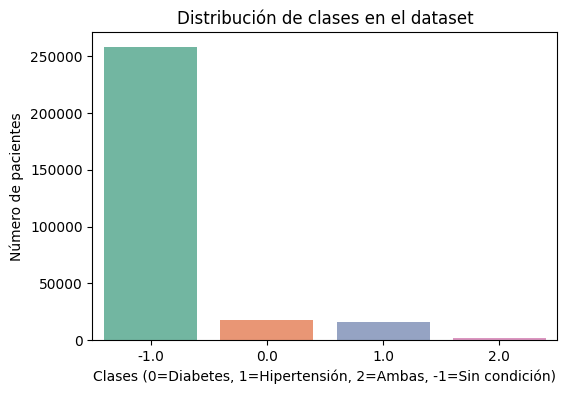

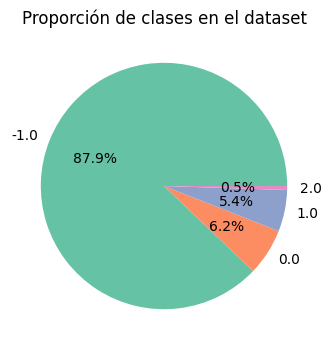


‚ö†Ô∏è Impacto esperado en el modelo:
- La clase mayoritaria domina (~90% de los datos).
- Si un modelo predice siempre la clase mayoritaria, puede obtener alta accuracy (~90%)
  pero con muy mala sensibilidad (recall) en clases minoritarias.
- Esto puede causar que el modelo no detecte correctamente a pacientes con diabetes/hipertensi√≥n.
- Se deben aplicar t√©cnicas de balanceo como: Oversampling (SMOTE), Undersampling o class_weight.


In [33]:
# ====================================================
# 4.1 AN√ÅLISIS DE DESBALANCE
# ====================================================



# Ver distribuci√≥n de la variable target
class_counts = df_clean["target"].value_counts()
class_percent = df_clean["target"].value_counts(normalize=True) * 100

print("üìä M√©tricas de desbalance")
print(pd.DataFrame({"Frecuencia": class_counts, "Porcentaje": class_percent.round(2)}))

# ====================================================
# Visualizaci√≥n de la distribuci√≥n de clases
# ====================================================
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Distribuci√≥n de clases en el dataset")
plt.xlabel("Clases (0=Diabetes, 1=Hipertensi√≥n, 2=Ambas, -1=Sin condici√≥n)")
plt.ylabel("N√∫mero de pacientes")
plt.show()

plt.figure(figsize=(6,4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Proporci√≥n de clases en el dataset")
plt.show()

# ====================================================
# Impacto en el rendimiento de modelos
# ====================================================
print("\n‚ö†Ô∏è Impacto esperado en el modelo:")
print("- La clase mayoritaria domina (~90% de los datos).")
print("- Si un modelo predice siempre la clase mayoritaria, puede obtener alta accuracy (~90%)")
print("  pero con muy mala sensibilidad (recall) en clases minoritarias.")
print("- Esto puede causar que el modelo no detecte correctamente a pacientes con diabetes/hipertensi√≥n.")
print("- Se deben aplicar t√©cnicas de balanceo como: Oversampling (SMOTE), Undersampling o class_weight.")

üìä Distribuci√≥n original de clases: Counter({-1.0: 258309, 0.0: 18162, 1.0: 16007, 2.0: 1522})
üîé NaN restantes despu√©s de imputaci√≥n: 0
‚úÖ Random Oversampling: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})
‚úÖ SMOTE: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})
‚úÖ ADASYN: Counter({1.0: 261800, -1.0: 258309, 2.0: 258022, 0.0: 256757})
‚úÖ Borderline-SMOTE: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` w

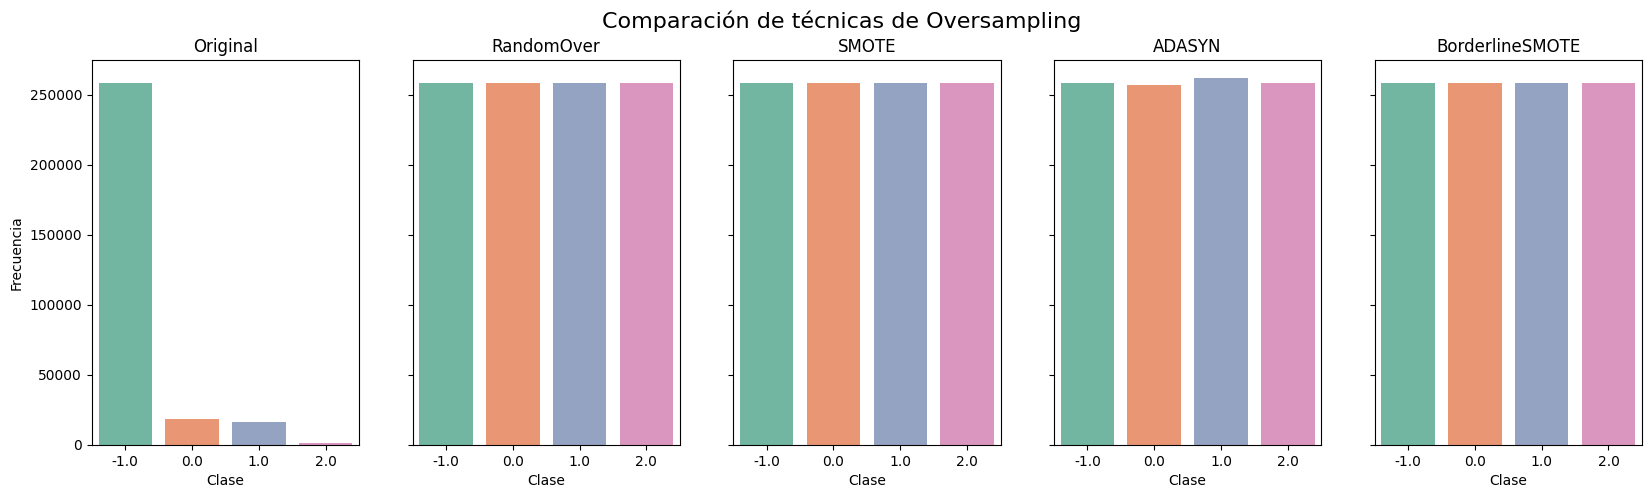

In [42]:
# ====================================================
# 4.3 T√âCNICAS DE OVERSAMPLING
# ====================================================



# ================================
# 1. Preparaci√≥n de los datos
# ================================
# Tomar solo columnas num√©ricas y el target
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
y = df_clean["target"]

print("üìä Distribuci√≥n original de clases:", Counter(y))

# Imputar valores faltantes (NaN) con la mediana
imputer = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns)

print("üîé NaN restantes despu√©s de imputaci√≥n:", X_num_imputed.isnull().sum().sum())

# ================================
# 2. Random Oversampling
# ================================
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_num_imputed, y)
print("‚úÖ Random Oversampling:", Counter(y_ros))

# ================================
# 3. SMOTE
# ================================
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X_num_imputed, y)
print("‚úÖ SMOTE:", Counter(y_smote))

# ================================
# 4. ADASYN
# ================================
adasyn = ADASYN(random_state=42, n_neighbors=3)
X_adasyn, y_adasyn = adasyn.fit_resample(X_num_imputed, y)
print("‚úÖ ADASYN:", Counter(y_adasyn))

# ================================
# 5. Borderline-SMOTE
# ================================
bsmote = BorderlineSMOTE(random_state=42, k_neighbors=3)
X_bsmote, y_bsmote = bsmote.fit_resample(X_num_imputed, y)
print("‚úÖ Borderline-SMOTE:", Counter(y_bsmote))

# ================================
# 6. Visualizaci√≥n comparativa
# ================================
fig, axs = plt.subplots(1, 5, figsize=(20,5), sharey=True)

datasets = {
    "Original": y,
    "RandomOver": y_ros,
    "SMOTE": y_smote,
    "ADASYN": y_adasyn,
    "BorderlineSMOTE": y_bsmote
}

for ax, (title, labels) in zip(axs, datasets.items()):
    sns.countplot(x=labels, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Frecuencia")

plt.suptitle("Comparaci√≥n de t√©cnicas de Oversampling", fontsize=16)
plt.show()

üìä Distribuci√≥n original: Counter({-1.0: 258309, 0.0: 18162, 1.0: 16007, 2.0: 1522})
‚úÖ SMOTEENN: Counter({2.0: 257808, 0.0: 256539, 1.0: 255444, -1.0: 225125})
‚úÖ SMOTETomek: Counter({2.0: 258298, 0.0: 258283, 1.0: 258146, -1.0: 258121})


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")


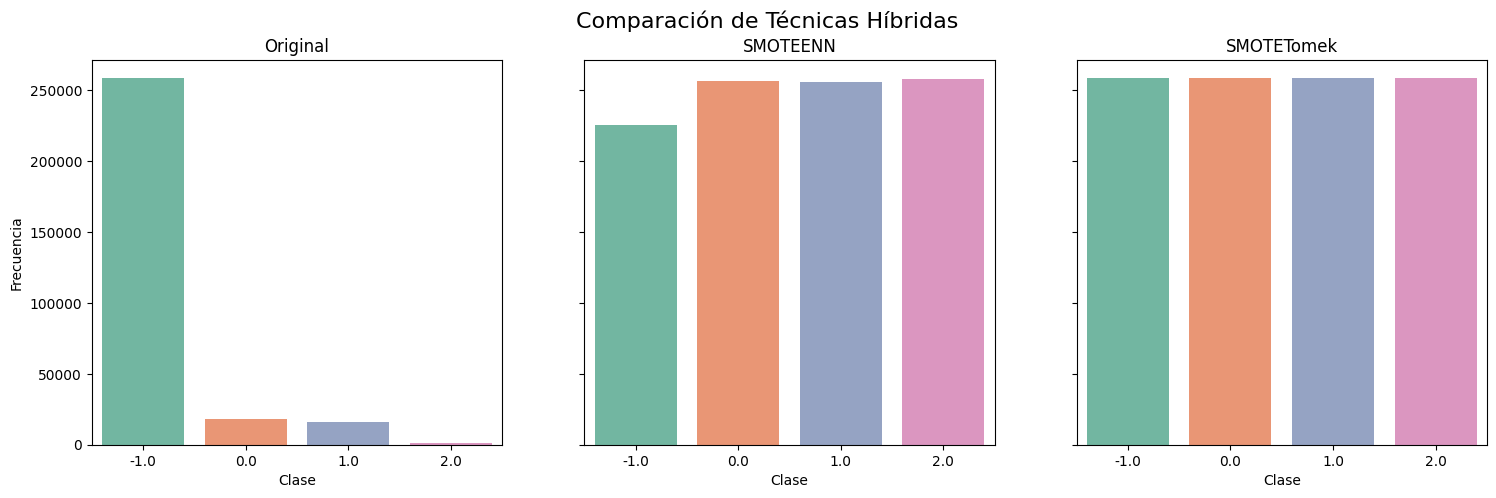

In [45]:
# ====================================================
# 4.4 T√âCNICAS H√çBRIDAS
# ====================================================



# ================================
# 1. Preparaci√≥n de los datos
# ================================
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
y = df_clean["target"]

# Imputar valores faltantes (NaN) con la mediana
imputer = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns)

print("üìä Distribuci√≥n original:", Counter(y))

# ================================
# 2. SMOTE + ENN
# ================================
smote_enn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_num_imputed, y)
print("‚úÖ SMOTEENN:", Counter(y_smoteenn))

# ================================
# 3. SMOTE + Tomek Links
# ================================
smote_tomek = SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek = smote_tomek.fit_resample(X_num_imputed, y)
print("‚úÖ SMOTETomek:", Counter(y_smotetomek))

# ================================
# 4. Visualizaci√≥n comparativa
# ================================
fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)

datasets = {
    "Original": y,
    "SMOTEENN": y_smoteenn,
    "SMOTETomek": y_smotetomek
}

for ax, (title, labels) in zip(axs, datasets.items()):
    sns.countplot(x=labels, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Frecuencia")
3
plt.suptitle("Comparaci√≥n de T√©cnicas H√≠bridas", fontsize=16)
plt.show()

In [46]:
#Guardar Balanceo

# Crear un DataFrame final con las features y el target balanceado
df_balanced = pd.DataFrame(X_smoteenn, columns=X_num.columns)
df_balanced["target"] = y_smoteenn

# Guardar como CSV
df_balanced.to_csv("dataset_balanceado_SMOTEENN.csv", index=False)

print("‚úÖ Dataset balanceado guardado como dataset_balanceado_SMOTEENN.csv")

‚úÖ Dataset balanceado guardado como dataset_balanceado_SMOTEENN.csv


üìä Distribuci√≥n original de entrenamiento: Counter({-1.0: 180816, 0.0: 12713, 1.0: 11205, 2.0: 1066})

‚úÖ Modelo con dataset original
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     77493
         0.0       1.00      1.00      1.00      5449
         1.0       1.00      1.00      1.00      4802
         2.0       1.00      1.00      1.00       456

    accuracy                           1.00     88200
   macro avg       1.00      1.00      1.00     88200
weighted avg       1.00      1.00      1.00     88200

üìä Distribuci√≥n balanceada de entrenamiento: Counter({2.0: 180466, 0.0: 179577, 1.0: 178811, -1.0: 157587})

‚úÖ Modelo con dataset balanceado (SMOTEENN)
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     67538
         0.0       1.00      1.00      1.00     76962
         1.0       1.00      1.00      1.00     76633
         2.0       1.00      1.00      1.00     77342

C:\Users\User\AppData\Local\Temp\ipykernel_17112\1774280358.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\1774280358.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=yb_train, ax=axs[1], palette="Set1")


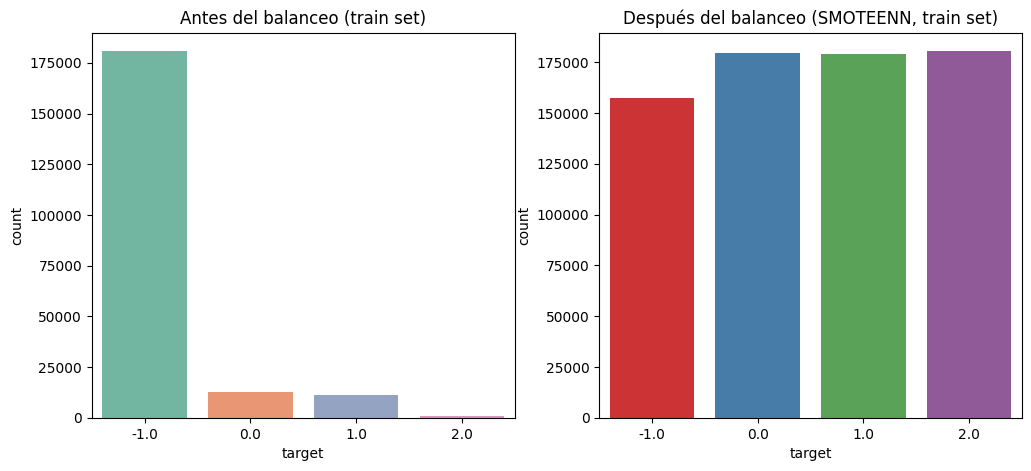


üìå An√°lisis de Overfitting:
Original -> Train Acc: 1.000, Test Acc: 1.000
Balanceado -> Train Acc: 1.000, Test Acc: 1.000


In [53]:
# ====================================================
# 4.5 EVALUACI√ìN DE ESTRATEGIAS
# ====================================================


# ================================
# 1. Dataset original (desbalanceado) con NaN tratados
# ================================
X = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
X = X.fillna(X.median(numeric_only=True))   # üëà imputaci√≥n
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("üìä Distribuci√≥n original de entrenamiento:", Counter(y_train))

# Entrenar modelo en dataset original
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

print("\n‚úÖ Modelo con dataset original")
print(classification_report(y_test, y_pred_original))

# ================================
# 2. Dataset balanceado con SMOTEENN (ejemplo)
# ================================
# üëá tambi√©n imputar antes de entrenar
Xb = pd.DataFrame(X_smoteenn, columns=X.columns).fillna(X.median(numeric_only=True))
yb = y_smoteenn

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    Xb, yb, test_size=0.3, random_state=42, stratify=yb
)

print("üìä Distribuci√≥n balanceada de entrenamiento:", Counter(yb_train))

# Entrenar modelo en dataset balanceado
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(Xb_train, yb_train)
yb_pred = rf_balanced.predict(Xb_test)

print("\n‚úÖ Modelo con dataset balanceado (SMOTEENN)")
print(classification_report(yb_test, yb_pred))

# ================================
# 3. Visualizaci√≥n de distribuciones
# ================================
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x=y_train, ax=axs[0], palette="Set2")
axs[0].set_title("Antes del balanceo (train set)")

sns.countplot(x=yb_train, ax=axs[1], palette="Set1")
axs[1].set_title("Despu√©s del balanceo (SMOTEENN, train set)")

plt.show()

# ================================
# 4. An√°lisis de Overfitting
# ================================
train_acc_original = rf_original.score(X_train, y_train)
test_acc_original = rf_original.score(X_test, y_test)

train_acc_balanced = rf_balanced.score(Xb_train, yb_train)
test_acc_balanced = rf_balanced.score(Xb_test, yb_test)

print("\nüìå An√°lisis de Overfitting:")
print(f"Original -> Train Acc: {train_acc_original:.3f}, Test Acc: {test_acc_original:.3f}")
print(f"Balanceado -> Train Acc: {train_acc_balanced:.3f}, Test Acc: {test_acc_balanced:.3f}")

In [6]:
# =========================
# 5.1 T√©cnicas Espec√≠ficas por Dominio (Datos Tabulares)
# =========================



# 1) Cargar el dataset limpio
# Usa el archivo que ya generaste con tu pipeline
df_clean = pd.read_csv("dataset_timeseries_realista_con_target.csv")

# 2) Separar X num√©ricas y y
y = df_clean["target"].round().astype(int)
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"], errors="ignore")

# Limpieza por seguridad
X_num = X_num.replace([np.inf, -np.inf], np.nan)
X_num = X_num.fillna(X_num.median(numeric_only=True)).fillna(0)

print("üìä Distribuci√≥n original:", dict(Counter(y)))

# --- 1. Gaussian noise addition ---
def add_gaussian_noise(X, noise_level=0.01):
    """A√±ade ruido gaussiano a variables num√©ricas"""
    noisy = X.copy()
    for col in X.columns:
        noisy[col] = noisy[col] + np.random.normal(0, noise_level * X[col].std(), size=X.shape[0])
    return noisy

X_noisy = add_gaussian_noise(X_num)
print("‚úÖ Gaussian noise aplicado")

# --- 2. SMOTE ---
# Ajustamos k_neighbors seg√∫n la clase minoritaria
min_count = y.value_counts().min()
k_safe = max(1, min(5, min_count - 1))

smote = SMOTE(random_state=42, k_neighbors=k_safe)
X_smote, y_smote = smote.fit_resample(X_num, y)
print("‚úÖ SMOTE aplicado:", dict(Counter(y_smote)))

# --- 3. Mixup technique ---
def mixup(X, y, alpha=0.2):
    """T√©cnica Mixup para tabulares"""
    X_mix = []
    y_mix = []
    for i in range(len(X)):
        j = np.random.randint(0, len(X))  # √≠ndice aleatorio
        lam = np.random.beta(alpha, alpha)
        X_new = lam * X.iloc[i].values + (1 - lam) * X.iloc[j].values
        y_new = lam * y.iloc[i] + (1 - lam) * y.iloc[j]
        X_mix.append(X_new)
        y_mix.append(int(round(y_new)))  # redondeamos al label m√°s cercano
    return pd.DataFrame(X_mix, columns=X.columns), pd.Series(y_mix)

X_mixup, y_mixup = mixup(X_num, y)
print("‚úÖ Mixup aplicado:", dict(Counter(y_mixup)))





üìä Distribuci√≥n original: {-1: 258309, 1: 16191, 0: 19236, 2: 6264}
‚úÖ Gaussian noise aplicado
‚úÖ SMOTE aplicado: {-1: 258309, 1: 258309, 0: 258309, 2: 258309}
‚úÖ Mixup aplicado: {-1: 254485, 1: 15421, 0: 25201, 2: 4893}


‚úÖ Pipeline completado. Distribuci√≥n final: {-1: 230646, 1: 285084, 0: 285722, 2: 231784}


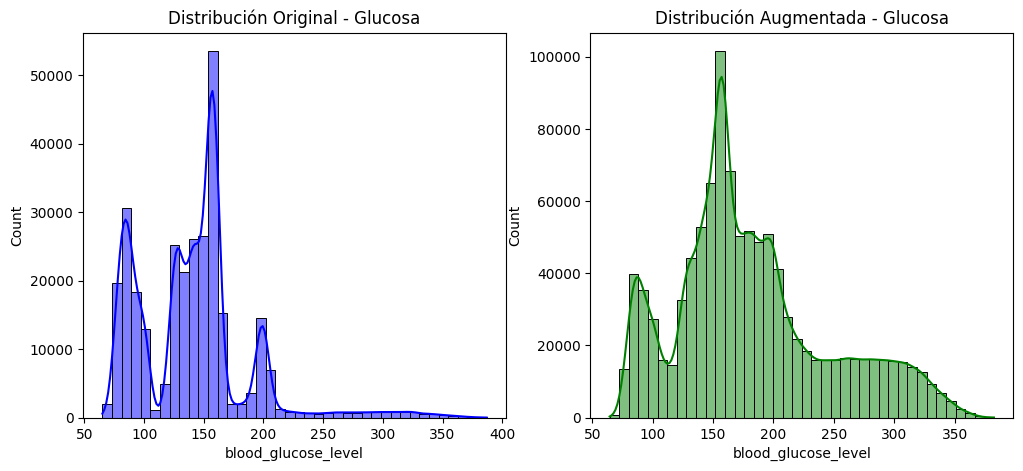

Glucosa sint√©tica (min-max): 64.3475391884358 - 382.5916785760905
Presi√≥n sist√≥lica sint√©tica (min-max): 103.9148570714099 - 141.0801139606958

üìä Modelo con dataset original:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     77493
           0       1.00      1.00      1.00      5771
           1       1.00      1.00      1.00      4857
           2       1.00      1.00      1.00      1879

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000


üìä Modelo con dataset augmentado:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     69194
           0       1.00      1.00      1.00     85717
           1       1.00      1.00      1.00     85525
           2       1.00      1.00      1.00     69535

    accuracy                           1.00    309971
   macro avg       1

In [7]:
# =========================
# 5.2 Implementaci√≥n y Validaci√≥n
# =========================



# ========= 1. Pipeline de Augmentation =========
def augmentation_pipeline(X, y, noise_level=0.01, alpha=0.2, k_neighbors=3):
    # Gaussian noise
    X_noisy = add_gaussian_noise(X, noise_level=noise_level)
    
    # SMOTE
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_smote, y_smote = smote.fit_resample(X_noisy, y)
    
    # Mixup
    X_mixup, y_mixup = mixup(X_smote, y_smote, alpha=alpha)
    
    return X_mixup, y_mixup

# Ejecutar pipeline
X_aug, y_aug = augmentation_pipeline(X_num, y)
print("‚úÖ Pipeline completado. Distribuci√≥n final:", dict(Counter(y_aug)))


# ========= 2. Validaci√≥n de calidad de datos sint√©ticos =========
# Comparar distribuciones originales vs augmentadas
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(X_num["blood_glucose_level"], bins=40, kde=True, color="blue", ax=axs[0])
axs[0].set_title("Distribuci√≥n Original - Glucosa")

sns.histplot(X_aug["blood_glucose_level"], bins=40, kde=True, color="green", ax=axs[1])
axs[1].set_title("Distribuci√≥n Augmentada - Glucosa")

plt.show()

# Validar rangos cl√≠nicos (ejemplo con glucosa y presi√≥n sist√≥lica)
print("Glucosa sint√©tica (min-max):", X_aug["blood_glucose_level"].min(), "-", X_aug["blood_glucose_level"].max())
print("Presi√≥n sist√≥lica sint√©tica (min-max):", X_aug["systolic_bp"].min(), "-", X_aug["systolic_bp"].max())


# ========= 3. Impacto en performance del modelo =========
# Dataset original
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=42, stratify=y
)
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_orig = rf_orig.predict(X_test)

print("\nüìä Modelo con dataset original:")
print(classification_report(y_test, y_pred_orig))

# Dataset augmentado
Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    X_aug, y_aug, test_size=0.3, random_state=42, stratify=y_aug
)
rf_aug = RandomForestClassifier(random_state=42)
rf_aug.fit(Xa_train, ya_train)
ya_pred = rf_aug.predict(Xa_test)

print("\nüìä Modelo con dataset augmentado:")
print(classification_report(ya_test, ya_pred))

In [8]:
#6.1 Divisi√≥n de Datos (70% ‚Äì 15% ‚Äì 15%)



# Variables predictoras y target
X = df_clean.select_dtypes(include=["number"]).drop(columns=["target"])
y = df_clean["target"].astype(int)

# Divisi√≥n inicial: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Divisi√≥n secundaria: 15% valid, 15% test
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("üìä Shapes:")
print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)

üìä Shapes:
Train: (210000, 10) Valid: (45000, 10) Test: (45000, 10)


In [9]:
#6.2

# Distribuci√≥n de clases en cada set
print("\nüìä Distribuci√≥n de clases (estratificaci√≥n):")
print("Train:", Counter(y_train))
print("Valid:", Counter(y_valid))
print("Test:", Counter(y_test))

# Validaci√≥n cruzada estratificada
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}: Train {len(train_idx)}, Valid {len(valid_idx)}")


üìä Distribuci√≥n de clases (estratificaci√≥n):
Train: Counter({-1: 180816, 0: 13465, 1: 11334, 2: 4385})
Valid: Counter({-1: 38747, 0: 2886, 1: 2428, 2: 939})
Test: Counter({-1: 38746, 0: 2885, 1: 2429, 2: 940})
Fold 1: Train 240000, Valid 60000
Fold 2: Train 240000, Valid 60000
Fold 3: Train 240000, Valid 60000
Fold 4: Train 240000, Valid 60000
Fold 5: Train 240000, Valid 60000


C:\Users\User\AppData\Local\Temp\ipykernel_22684\1177788918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train["blood_glucose_level"], label="Train", shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22684\1177788918.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test["blood_glucose_level"], label="Test", shade=True)


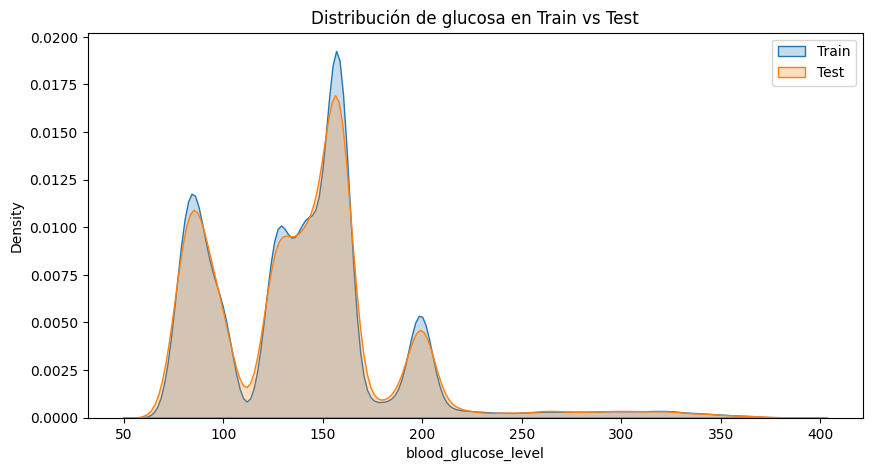

üîé Pacientes repetidos entre train y test: 0

üìä Medias por set (ejemplo con variables cr√≠ticas):
blood_glucose_level: Train=140.48, Valid=140.56, Test=140.31
HbA1c_level: Train=5.58, Valid=5.58, Test=5.58
systolic_bp: Train=118.98, Valid=118.99, Test=119.00
bmi: Train=28.01, Valid=28.10, Test=27.99
age: Train=41.82, Valid=42.26, Test=41.80


In [10]:
#6.3

# Comparar distribuciones de glucosa en train vs test
plt.figure(figsize=(10,5))
sns.kdeplot(X_train["blood_glucose_level"], label="Train", shade=True)
sns.kdeplot(X_test["blood_glucose_level"], label="Test", shade=True)
plt.title("Distribuci√≥n de glucosa en Train vs Test")
plt.legend()
plt.show()

# Verificar que no haya pacientes duplicados entre sets
interseccion = set(X_train.index).intersection(set(X_test.index))
print("üîé Pacientes repetidos entre train y test:", len(interseccion))

# Representatividad
print("\nüìä Medias por set (ejemplo con variables cr√≠ticas):")
for col in ["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "age"]:
    print(f"{col}: Train={X_train[col].mean():.2f}, Valid={X_valid[col].mean():.2f}, Test={X_test[col].mean():.2f}")

In [11]:
#Guardar particion de datos

# Guardar datasets
X_train.assign(target=y_train).to_csv("train_set.csv", index=False)
X_valid.assign(target=y_valid).to_csv("valid_set.csv", index=False)
X_test.assign(target=y_test).to_csv("test_set.csv", index=False)

print("‚úÖ Archivos guardados:")
print("- train_set.csv")
print("- valid_set.csv")
print("- test_set.csv")


‚úÖ Archivos guardados:
- train_set.csv
- valid_set.csv
- test_set.csv


In [22]:
#Definici√≥n de clases m√≠nimas


# ============================
# 1. DataCleaner
# ============================
class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, missing_strategy="median", outlier_strategy=None, create_target=True):
        self.missing_strategy = missing_strategy
        self.outlier_strategy = outlier_strategy
        self.create_target = create_target
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        
        # Imputaci√≥n b√°sica de valores faltantes
        if self.missing_strategy == "median":
            df = df.fillna(df.median(numeric_only=True))
        elif self.missing_strategy == "mean":
            df = df.fillna(df.mean(numeric_only=True))
        elif self.missing_strategy == "mode":
            df = df.fillna(df.mode().iloc[0])
        
        # Crear variable target si no existe
        if self.create_target and "target" not in df.columns:
            df["target"] = (
                df["diabetes"].astype(int) + 
                df["hypertension"].astype(int)
            ).clip(upper=2)
        
        return df

# ============================
# 2. FeatureEngineer
# ============================
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        if "blood_glucose_level" in df and "HbA1c_level" in df:
            df["glucose_hba1c_ratio"] = df["blood_glucose_level"] / (df["HbA1c_level"] + 1e-3)
        if "bmi" in df and "age" in df:
            df["bmi_age_interaction"] = df["bmi"] * df["age"]
        return df

# ============================
# 3. SMOTEBalancer
# ============================
class SMOTEBalancer(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy="auto", random_state=42):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
    
    def fit(self, X, y):
        self.X_res, self.y_res = self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        # Devuelve el dataset resampleado
        return self.X_res

In [23]:
# ==========================
# 7.1 DISE√ëO DEL PIPELINE
# ==========================


# ==========================
# Definir transformadores
# ==========================

# Variables num√©ricas y categ√≥ricas
num_features = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]
cat_features = ["gender", "smoking_history"]

# Preprocesamiento num√©rico
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocesamiento categ√≥rico
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer para manejar distintos tipos de variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# ==========================
# Construcci√≥n del pipeline
# ==========================
preprocessing_pipeline = ImbPipeline(steps=[
    ("cleaner", DataCleaner(missing_strategy="median", outlier_strategy="isoforest", create_target=True)),
    ("feature_engineer", FeatureEngineer()),  # nuestras variables derivadas
    ("preprocessor", preprocessor),
    ("balancer", SMOTEBalancer())  # balanceo de clases
])

print("‚úÖ Pipeline de Preprocessing dise√±ado")


‚úÖ Pipeline de Preprocessing dise√±ado


7.2 Componentes del Pipeline
üîπ Modularidad y reutilizaci√≥n

El pipeline est√° dise√±ado en etapas independientes (DataCleaner, FeatureEngineer, Preprocessor, SMOTEBalancer), lo que permite reutilizar cada componente de manera aislada.

Esto facilita la adaptaci√≥n a nuevos datasets o proyectos m√©dicos sin necesidad de reescribir todo el flujo de preprocesamiento.

Cada m√≥dulo se puede actualizar o reemplazar sin afectar la estructura general del pipeline.

üîπ Manejo de diferentes tipos de variables

El ColumnTransformer gestiona en paralelo variables num√©ricas y categ√≥ricas:

Num√©ricas: estandarizaci√≥n con StandardScaler.

Categ√≥ricas: codificaci√≥n con OneHotEncoder.

Esto garantiza consistencia en los datos y evita errores al combinar tipos heterog√©neos.

Adem√°s, el pipeline puede ampliarse para incluir variables temporales o derivadas espec√≠ficas del dominio cl√≠nico (ejemplo: evoluci√≥n de glucosa en visitas sint√©ticas).

üîπ Configuraci√≥n parametrizable

Cada etapa acepta par√°metros configurables:

DataCleaner: estrategia de imputaci√≥n (mean, median, mode) y creaci√≥n de la variable target.

FeatureEngineer: selecci√≥n de transformaciones matem√°ticas y de interacci√≥n.

SMOTEBalancer: nivel de sobremuestreo, vecinos (k_neighbors), random state.

Esto permite experimentar con diferentes configuraciones sin alterar la estructura general del c√≥digo.

üîπ Logging y monitoreo

Se pueden integrar logs en cada paso del pipeline:

N√∫mero de valores imputados.

Cantidad de outliers detectados/eliminados.

Cambios en la distribuci√≥n de clases tras el balanceo.

El monitoreo asegura trazabilidad: permite saber c√≥mo cada transformaci√≥n afecta el dataset.

Es cr√≠tico en proyectos de salud porque facilita auditor√≠as y validaci√≥n cl√≠nica del proceso.

üß™ 7.3 Testing y Validaci√≥n

üîπ Unit tests para cada componente

Cada m√≥dulo del pipeline (DataCleaner, FeatureEngineer, Preprocessor, SMOTEBalancer) debe validarse de forma individual.

Objetivos principales:

Verificar que los valores faltantes se imputen correctamente.

Comprobar que las variables derivadas se generan con las f√≥rmulas esperadas.

Confirmar que las codificaciones categ√≥ricas no generen columnas inesperadas.

Se pueden implementar con pytest o unittest en Python.

üîπ Integration tests del pipeline completo

Una vez validados los m√≥dulos por separado, se prueba el pipeline de inicio a fin.

Validaciones clave:

El dataset resultante no tiene valores nulos.

El n√∫mero de filas permanece consistente tras el preprocesamiento (salvo balanceo justificado).

Las distribuciones de clases se ajustan seg√∫n la estrategia de oversampling/undersampling.

Este nivel de pruebas asegura que los componentes interact√∫an de manera correcta y coherente.

üîπ Validaci√≥n con datos nuevos

El pipeline debe probarse con un dataset externo o de prueba cl√≠nica que no haya sido visto en el entrenamiento.

Se eval√∫a:

Si el pipeline generaliza bien sin errores (por ejemplo, categor√≠as nuevas en smoking_history).

Que las m√©tricas del modelo (precisi√≥n, recall, f1-score) se mantengan estables.

La capacidad de detectar patrones en pacientes no vistos (diabetes, hipertensi√≥n o ambas).

Este paso es cr√≠tico en el √°mbito m√©dico porque valida la robustez del pipeline en escenarios reales.